# Sommaire <a name=0 ></a>
- [Introduction et Problématique](#1)
- [I. Classification de Produits par Texte](#2)
    - [1. Prétraitement des Données](#3)
    - [2. Vectorisation des Données](#4)
        - [2.1 BoW](#5)
            - [a. Régression Logistique](#6)
            - [b. Analyse en Composantes Principales (PCA) & T-SNE](#7)
        - [2.2 TF-IDF](#8)
            - [a. Régression Logistique](#9)
            - [b. Analyse en Composantes Principales (PCA) & T-SNE](#10)
    - [3. Approches Avancées de Vectorisation](#11)
        - [3.1 Word2Vec](#12)
            - [a. Régression Logistique](#13)
            - [b. Analyse en Composantes Principales (PCA) & T-SNE](#14)
        - [3.2 BERT (Hugging Face)](#15)
            - [a. Régression Logistique](#16)
            - [b. Analyse en Composantes Principales (PCA) & T-SNE](#17)
        - [3.3 BERT (Tensor Flow)](#18)
            - [a. Régression Logistique](#19)
            - [b. Analyse en Composantes Principales (PCA) & T-SNE](#20)
        - [3.4 USE](#21)
            - [a. Régression Logistique](#22)
            - [b. Analyse en Composantes Principales (PCA) & T-SNE](#23)
    - [Conclusion](#24)
- [II. Classification de Produits par Image](#25)
    - [1. Visualisation des Images](#26)
    - [2. Prétraitement des Images](#27)
    - [3. Extraction de Caractéristiques](#28)
        - [3.1 SIFT](#29)
            - [a. Régression Logistique](#30)
            - [b. Analyse en Composantes Principales (PCA) & T-SNE](#31)
        - [3.2 ORB](#32)
            - [a. Régression Logistique](#33)
            - [b. Analyse en Composantes Principales (PCA) & T-SNE](#34)
    - [4. Réseaux de Neurones Pré-Entraînés (CNN)](#35)
        - [4.1 VGG16](#36)
            - [a. Régression Logistique](#37)
            - [b. Analyse en Composantes Principales (PCA) & T-SNE](#38)
        - [4.2 Restnet50](#39)
            - [a. Régression Logistique](#40)
            - [b. Analyse en Composantes Principales (PCA) & T-SNE](#41)
    - [Conclusion](#42)
- [Conclusion](#43)

# Introduction et Problématique<a name=1 ></a>

Le projet qui suit consiste à développer une solution automatisée de classification d’articles pour la plateforme e-commerce anglophone "Place de marché". À l'heure actuelle, les vendeurs attribuent eux-mêmes les catégories des produits, une tâche manuelle susceptible d'entraîner des erreurs et un manque de cohérence. Cette situation complique la recherche et la navigation pour les acheteurs, tout en ralentissant la mise en ligne pour les vendeurs.

Avec l’augmentation attendue du volume de produits sur la plateforme, il devient crucial de mettre en place un moteur de classification automatique basé sur les descriptions textuelles et les images des articles. L’objectif ici est donc de faciliter le processus de catégorisation, tant pour les vendeurs que pour les acheteurs, tout en garantissant la précision de l’attribution des catégories.

Le projet se décompose en deux missions principales :

Mission 1 : Évaluer la faisabilité d’une classification des produits en utilisant leurs descriptions textuelles dans un premier temps, puis leurs images dans un secon temps. Cette première étape se concentre sur le prétraitement des données, l’extraction des features, et l’utilisation de techniques de réduction de dimension pour visualiser les catégories réelles et potentiellement prédictives.

Mission 2 : Améliorer l’analyse des images en implémentant une classification supervisée et en optimisant les performances via une technique de data augmentation. De plus, un test de collecte de données via une API spécifique à un produit (comme le “champagne”) sera réalisé.

Le notebook ci-se chargera donc de répondre à la première mission de ce projet, c'est-à-dire d'effectuer l'étude de faisabilité de la classification automatique à partir des textes et/ou des images. La seconde mission sera présentée dans un deuxième notebook, tout comme la collecte de données via l'API dans un troisième, pour un total de 3 fichiers. Au terme de cette présentation, nous proposerons une solution technique permettant d’automatiser la classification des articles, rendant ainsi l’expérience utilisateur plus fluide et évolutive. L’objectif final, dans ce fichier sera ainsi de valider cette faisabilité tout en fournissant un modèle de classification performant et scalable.

Commençons d'abord par importer et visualiser le dataset qui nous servira d'outil de travail.

In [2]:
import pandas as pd

# Chargement des données Flipkart
flipkart = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

# Affichage du DataFrame
flipkart

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

# I. Classification de Produits par Texte<a name=2 ></a>

La classification de produits basée sur du texte est une tâche cruciale dans le traitement du langage naturel (NLP) qui vise à attribuer des étiquettes à des éléments en fonction de leurs descriptions textuelles. Cela est particulièrement pertinent pour les plateformes de e-commerce comme Flipkart, où les utilisateurs doivent rapidement trouver des produits spécifiques parmi une vaste gamme. 

L'objectif de cette étude est de développer un modèle capable de classer efficacement les produits en fonction de leurs descriptions textuelles, ce qui pose plusieurs défis : Comment traiter et normaliser les données textuelles ? Quelles méthodes de vectorisation permettent de transformer le texte en vecteurs numériques exploitables ? Et quelles techniques d'apprentissage automatique sont les plus appropriées pour assurer une classification précise ?

Pour répondre à ces questions, nous allons explorer une gamme de méthodes, allant des approches classiques comme Bag of Words et TF-IDF, jusqu'à des techniques avancées utilisant des modèles pré-entraînés tels que BERT et Universal Sentence Encoder. À travers cette étude, nous espérons mesurer l'impact de la qualité de la représentation textuelle sur les performances de classification.

Ce processus implique plusieurs étapes de prétraitement, de vectorisation, d'entraînement de modèles et d'évaluation. Dans cette section, nous explorerons une approche systématique pour classifier des produits en utilisant des descriptions textuelles, en commençant par le prétraitement des données, suivie par diverses techniques de vectorisation et enfin, en utilisant des modèles d'apprentissage automatique et de deep learning pour effectuer la classification.

## 1. Prétraitement des Données<a name=3 ></a>

Le prétraitement des données textuelles constitue la première étape essentielle dans le traitement de tout ensemble de données textuelles. C'est la condition sine qua non pour garantir la qualité des entrées fournies aux modèles d'apprentissage, et c'est pourquoi chaque étape doit être soigneusement considérée pour maximiser la pertinence des données traitées. Pour débuter, nous avons effectué une série de transformations sur le nom d'un des produits extrait de notre jeu de données.

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Définir les mots vides (stopwords) en anglais
stop_words = set(stopwords.words('english'))

# Initialiser le stemmer et le lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Initialiser le tokenizer pour extraire les mots
word_tokenizer = nltk.RegexpTokenizer(r'\w+')

# Prétraitement d'un texte de la colonne 'product_name'
text_lower = flipkart['product_name'].iloc[0].lower()
tokens = word_tokenizer.tokenize(text_lower)
tokens_no_stopwords = [word for word in tokens if word not in stop_words]
tokens_stemmed = [stemmer.stem(word) for word in tokens_no_stopwords]
tokens_lemmatized = [lemmatizer.lemmatize(word) for word in tokens_stemmed]
final_text = ' '.join(tokens_lemmatized)

# Affichage des résultats intermédiaires et finaux
print(f"Texte original : \n{flipkart['product_name'].iloc[0]}\n")
print(f"Après conversion en minuscules : \n{text_lower}\n")
print(f"Après tokenization : \n{tokens}\n")
print(f"Après suppression des stopwords : \n{tokens_no_stopwords}\n")
print(f"Après stemming : \n{tokens_stemmed}\n")
print(f"Après lemmatization : \n{tokens_lemmatized}\n")
print(f"Texte final après prétraitement : \n{final_text}\n")

Texte original : 
Elegance Polyester Multicolor Abstract Eyelet Door Curtain

Après conversion en minuscules : 
elegance polyester multicolor abstract eyelet door curtain

Après tokenization : 
['elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain']

Après suppression des stopwords : 
['elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain']

Après stemming : 
['eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain']

Après lemmatization : 
['eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain']

Texte final après prétraitement : 
eleg polyest multicolor abstract eyelet door curtain



D'une manière générale, un texte brut peut contenir des incohérences qui nuisent à la performance des modèles. Voici l'ensemble des étapes du prétraitement que nous avons ici accompli sur notre texte :

- Conversion en minuscules : La première opération consiste à convertir le texte en minuscules pour assurer l'uniformité. Cela permet d'éliminer les incohérences potentielles lors de l'analyse, où des variations comme "Produit" et "produit" pourraient fausser les résultats. Cette étape, bien que simple, est fondamentale pour assurer la cohérence des données, ce qui est un prérequis pour toute analyse ultérieure.

- Tokenisation : Consiste à segmenter le texte en unités plus petites appelées tokens, permettant d'extraire des éléments significatifs pour l'analyse. En transformant la description de chaque produit en une liste de mots, nous nous préparons à effectuer une analyse plus fine sur les contenus, car cela permet d'extraire des éléments significatifs à partir de phrases complètes. Cette étape nous aide à structurer le texte de manière à pouvoir quantifier et évaluer chaque mot et son impact sur la classification.

- Suppression des Stopwords : Les stopwords sont des mots courants qui n'apportent pas beaucoup de valeur sémantique, comme "et", "ou", "le", car ils ne portent pas d'informations significatives et sont donc souvent inutiles dans le contexte de classification . Leur suppression aide à se concentrer sur les mots qui ont un sens plus riche et plus pertinent pour le sujet. En éliminant ces termes, nous réduisons le bruit dans nos données, permettant aux modèles d'apprentissage automatique de mieux apprendre les distinctions entre les différentes catégories de produits.

- Stemming et Lemmatization : Le stemming et la lemmatisation réduisent les mots à leur racine ou à leur forme canonique, ce qui permet d’uniformiser les variations de mots. Par exemple, "courir" devient "cour" par stemming, tandis que "mieux" devient "bon" par lemmatisation. Ces techniques sont particulièrement utiles pour réduire la complexité des données et assurer que le modèle ne soit pas influencé par des variations superficielles des mots. Cela aide à capturer le sens profond des descriptions de produits et à renforcer l'apprentissage des modèles.

- Assemblage Final : Une fois ces transformations effectuées, les tokens sont assemblés pour former un texte prétraité. Ce texte est maintenant prêt à être vectorisé, et les étapes suivantes exploreront comment convertir ces descriptions textuelles en données numériques exploitables.

Maintenant que nous avons vu que les étapes de prétraitement de texte sont concluantes, nous allons dès lors les appliquer sur les données textuelles de l'ensemble de notre dataset. Nous veillerons, bien évidemment, à ce que ce processus soit effectué après avoir, au préalable, procédé à une sélection des features du dataset considérées comme essentielles dans le cadre de notre mission.

In [6]:
# Sélection des colonnes pertinentes du dataset Flipkart
flipkart = flipkart[['uniq_id', 'product_name', 'product_category_tree', 'image', 'description', 'brand']].copy()

# Extraction de la première catégorie des produits
flipkart.loc[:, 'product_category'] = flipkart['product_category_tree'].apply(lambda x: x.split(' >> ')[0])
flipkart.loc[:, 'product_category'] = flipkart['product_category'].str.strip('["')

# Fonction de prétraitement du texte
def preprocess_text(text):
    """
    Prétraitement du texte: minuscule, tokenization, stopwords, stemming, lemmatization.
    """
    text = text.lower()  # Conversion en minuscules
    tokens = word_tokenizer.tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Suppression des stopwords
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    # tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    text = ' '.join(tokens)  # Recombinaison des tokens en texte
    return text

# Application du prétraitement aux colonnes 'description' et 'product_name'
flipkart['description_cleaned'] = flipkart['description'].apply(preprocess_text)
flipkart['product_name_cleaned'] = flipkart['product_name'].apply(preprocess_text)

# Affichage des colonnes pertinentes
flipkart[['uniq_id', 'product_name', 'brand', 'product_name_cleaned', 'description_cleaned', 'product_category']]

uniq_id  \
0     55b85ea15a1536d46b7190ad6fff8ce7   
1     7b72c92c2f6c40268628ec5f14c6d590   
2     64d5d4a258243731dc7bbb1eef49ad74   
3     d4684dcdc759dd9cdf41504698d737d8   
4     6325b6870c54cd47be6ebfbffa620ec7   
...                                ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc   
1046  fd6cbcc22efb6b761bd564c28928483c   
1047  5912e037d12774bb73a2048f35a00009   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6   
1049  f2f027ad6a6df617c9f125173da71e44   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                      brand  \
0                  Elegance   
1                  Sathiyas   
2                   Eurospa   
3     SANTOSH ROYAL FASHION   
4              Jaipur Print   
...                     ...   
1045           Oren Empower   
1046             Wallmantra   
1047               Uberlyfe   
1048             Wallmantra   
1049               Uberlyfe   

                                   product_name_cleaned  \
0     eleg polyest multicolor abstract eyelet door c...   
1                             sathiya cotton bath towel   
2                   eurospa cotton terri face towel set   
3     santosh royal fashion cotton print king size d...   
4     jaipur print cotton floral king size doubl bed...   
...                                                 ...   
1045           oren empow extra larg self adhes sticker   
1046              wallmantra larg vinyl sticker sticker   
1047  uberlyf extra larg pigment polyvinyl film impo...   
1048            wallmantra medium vinyl sticker sticker   
1049                         uberlyf larg vinyl sticker   

                                    description_cleaned product_category  
0     key featur eleg polyest multicolor abstract ey...  Home Furnishing  
1     specif sathiya cotton bath towel 3 bath towel ...        Baby Care  
2     key featur eurospa cotton terri face towel set...        Baby Care  
3     key featur santosh royal fashion cotton print ...  Home Furnishing  
4     key featur jaipur print cotton floral king siz...  Home Furnishing  
...                                                 ...              ...  
1045  oren empow extra larg self adhes sticker pack ...        Baby Care  
1046  wallmantra larg vinyl sticker sticker pack 1 p...        Baby Care  
1047  buy uberlyf extra larg pigment polyvinyl film ...        Baby Care  
1048  buy wallmantra medium vinyl sticker sticker rs...        Baby Care  
1049  buy uberlyf larg vinyl sticker rs 595 onlin ub...        Baby Care  

[1050 rows x 6 columns]

Grâce à la création des colonnes "product_name_cleaned" et "description_cleaned", qui représentent respectivement les features "product_name" et "description" après prétraitement de texte, notre jeu de données est désormais prêt à être vectorisé pour tous les modèles que nous serons à même de tester. Nous pouvons donc passer justement à la deuxième partie de ce chapitre qui porte sur la vectorisation des données.

## 2. Vectorisation des Données<a name=4 ></a>

La vectorisation est le processus qui transforme le texte prétraité en représentations numériques. Ces représentations sont essentielles, car elles permettent aux modèles d'apprentissage automatique d'effectuer des calculs. Nous allons explorer plusieurs méthodes de vectorisation, des plus classiques aux plus avancées, pour déterminer celles qui offrent les meilleures performances.

Après la vectorisation, nous avons appliqué divers modèles de classification pour évaluer les performances des représentations vectorielles obtenues. En effet, pour évaluer l'efficacité des différents modèles, nous avons utilisé tout d'abord une régression logistique comme classificateur dont nous avons mesuré le niveau de précision par rapport à la classification réelle des produits.

Dans un second temps, nous souhaitons visualiser la performance de chacun des modèles. Pour se faire, nous appliquerons l'Analyse en Composantes Principales (PCA) ainsi que T-SNE sur les données. D'un côté, la PCA nous permet de réduire la dimensionnalité des données tout en préservant le maximum d'information, facilitant ainsi l'interprétation des résultats. De l'autre, t-SNE (t-Distributed Stochastic Neighbor Embedding) est particulièrement utile pour la visualisation de données à haute dimension, car il préserve la proximité des points dans l'espace d'origine.

### 2.1 BoW<a name=5 ></a>

Le modèle Bag of Words (BoW) est une méthode utilisée pour représenter des textes en traitement du langage naturel (NLP). Dans ce modèle, un document est considéré comme un ensemble de mots, sans tenir compte de la grammaire ni de l’ordre des mots. Pour créer une représentation BoW, on commence par diviser le texte en mots, ou "tokens", et à constituer un vocabulaire contenant tous les mots uniques présents dans le corpus.

Chaque document est ensuite représenté par un vecteur dont chaque dimension correspond à un mot du vocabulaire. La valeur de chaque dimension indique le nombre d’occurrences de ce mot dans le document. Ainsi, le modèle capture l’information sur la fréquence des mots, mais il ne prend pas en compte le contexte ou les relations entre les mots, ce qui peut entraîner une perte d’informations significatives.

Malgré ses limitations, comme la perte de nuances sémantiques et la croissance potentielle de la dimensionnalité du vecteur pour de grands corpus, le modèle Bag of Words reste une approche de base en traitement du langage naturel et est souvent utilisé comme point de départ pour des analyses textuelles.

#### a. Régression Logistique<a name=6 ></a>

Nous allons donc commencer par créer notre modèle. Ensuite, nous allons l'utiliser pour procéder à une classification de nos produits basé sur les principes de la régression logistique. Cela permettra de vérifier l'efficacité de prédiction du modèle Bag of Word.

Les performances du modèle seront donc évaluées en calculant la précision de ses prédictions et en fournissant un rapport détaillant comment il se comporte pour chaque catégorie de produit. Cela permet de comprendre à quel point le modèle est efficace pour classer correctement les descriptions des produits.

Dans ce cadre, nous avons ajusté les paramètre du modèle de la manière suivante :
- max_df : Ignore les mots qui apparaissent dans plus de 95 % des documents.
- min_df : Ignore les mots qui apparaissent dans moins de 1 % des documents.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Création du vecteur Bag of Words
bow_vectorizer = CountVectorizer(max_df=0.95, min_df=0.01)
X_bow = bow_vectorizer.fit_transform(flipkart['description_cleaned'])

# Fonction de prédiction avec la régression logistique
def predict_fct(features):
    """
    Effectue une prédiction de la catégorie de produit en utilisant la 
    régression logistique, et affiche l'accuracy et un rapport de classification.
    """
    X_train, X_test, y_train, y_test = train_test_split(features, flipkart['product_category'], test_size=0.2, 
                                                        random_state=42)
    # Initialisation et entraînement du modèle
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Prédiction et évaluation du modèle
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Application de la fonction de prédiction avec les features BoW
predict_fct(X_bow)

Accuracy: 0.9333333333333333

Classification Report:
                            precision    recall  f1-score   support

                 Baby Care       0.96      0.81      0.88        27
  Beauty and Personal Care       0.80      0.95      0.87        21
                 Computers       1.00      0.97      0.99        38
Home Decor & Festive Needs       0.93      0.90      0.92        30
           Home Furnishing       0.92      0.97      0.94        35
          Kitchen & Dining       0.88      0.88      0.88        26
                   Watches       1.00      1.00      1.00        33

                  accuracy                           0.93       210
                 macro avg       0.93      0.93      0.93       210
              weighted avg       0.94      0.93      0.93       210



Notre modèle atteint une précision de 93 %. Ce résultat indique que, malgré la simplicité de la méthode BoW, elle est capable de capturer des informations significatives des descriptions de produits.

La précision élevée suggère que même des méthodes relativement simples peuvent être efficaces pour des tâches de classification, tant que les données sont bien prétraitées. Toutefois, il est important de noter que cette approche peut souffrir d'une perte d'information contextuelle, car elle ne tient pas compte de l'ordre des mots.

En effet, le modèle ici a bien performé pour la plupart des catégories, mais des améliorations pourraient être apportées à la catégorie "Baby Care", qui a un rappel relativement faible. Cela pourrait être dû à un manque de données ou à des caractéristiques moins discriminantes dans les descriptions de produits pour cette catégorie.

#### b. Analyse en Composantes Principales (PCA) & T-SNE<a name=7 ></a>

Pour rappel, la PCA, ou Analyse en Composantes Principales, est une technique de réduction de dimensionnalité utilisée pour simplifier des ensembles de données complexes tout en conservant autant d'information que possible. Elle fonctionne en identifiant les directions dans lesquelles les données varient le plus, appelées composantes principales. La première composante principale capte la plus grande partie de la variance des données, suivie par la seconde, et ainsi de suite.

En projetant les données dans un espace de dimension inférieure, la PCA facilite la visualisation et l'interprétation des données, permettant de mieux observer la séparation entre différentes catégories de produits. Cela aide à repérer des motifs et des relations, tout en réduisant le bruit et en améliorant l'efficacité des algorithmes de machine learning. En résumé, la PCA est un outil essentiel pour analyser des données de haute dimension et obtenir des perspectives claires sur leur structure sous-jacente.

Nous allons donc ici appliquer une PCA sur les données extraites précédemment via le modèle Bag of Word et visualiser ainsi le degré répartition par catégorie.

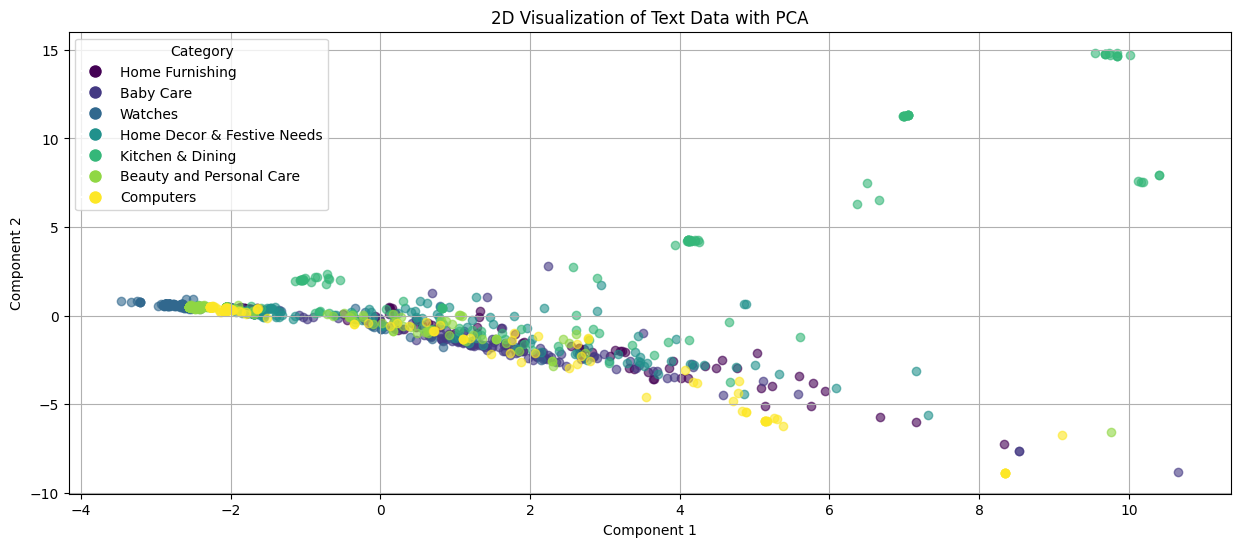

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Fonction de visualisation PCA
def pca_fct(features):
    """
    Effectue une réduction dimensionnelle avec PCA sur les features et affiche une visualisation 2D des données.
    """
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(features)
    reduced_df = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])
    reduced_df['category'] = flipkart['product_category']
    
    # Récupération des catégories et des couleurs
    categories = reduced_df['category'].unique()
    cmap = plt.get_cmap('viridis', 7)
    color_dict = {cat: cmap(i) for i, cat in enumerate(categories)}
    
    # Plotting
    plt.figure(figsize=(15, 6))
    for category in categories:
        subset = reduced_df[reduced_df['category'] == category]
        plt.scatter(subset['Component 1'], subset['Component 2'], color=color_dict[category], label=category,alpha=0.6)
    
    # Légende et configuration
    handles = [mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[cat], markersize=10, 
                             label=cat) for cat in categories]
    plt.legend(handles=handles, title='Category')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('2D Visualization of Text Data with PCA')
    plt.grid()
    plt.show()
    
# Application de la PCA sur les données BoW et visualisation
pca_fct(X_bow.toarray())

Après avoir exploré les données avec l'Analyse en Composantes Principales (PCA), nous avons utilisé t-SNE, ou t-Distributed Stochastic Neighbor Embedding, pour visualiser la structure des données en deux dimensions. Il s'agit d'une autre technique de réduction de dimensionnalité principalement utilisée pour la visualisation de données. Contrairement à la PCA, qui préserve la variance globale des données, le t-SNE se concentre sur la préservation des relations locales entre les points de données. Il fonctionne en transformant des distances euclidiennes dans l'espace élevé en probabilités de similarité dans un espace de dimension inférieure.

Cette approche permet de représenter des groupes ou des clusters de points similaires de manière plus distincte. En utilisant le t-SNE, il devient possible de visualiser des ensembles de données complexes, tels que des images ou des textes, dans un espace de faible dimension, souvent en 2D ou 3D. Cela aide à identifier des structures sous-jacentes et des regroupements qui pourraient ne pas être évidents dans l'espace original. En résumé, le t-SNE est un outil puissant pour explorer et interpréter des données complexes de manière intuitive.

CountVectorizer:


C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Alex-\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Alex-\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


ARI score: 0.4284


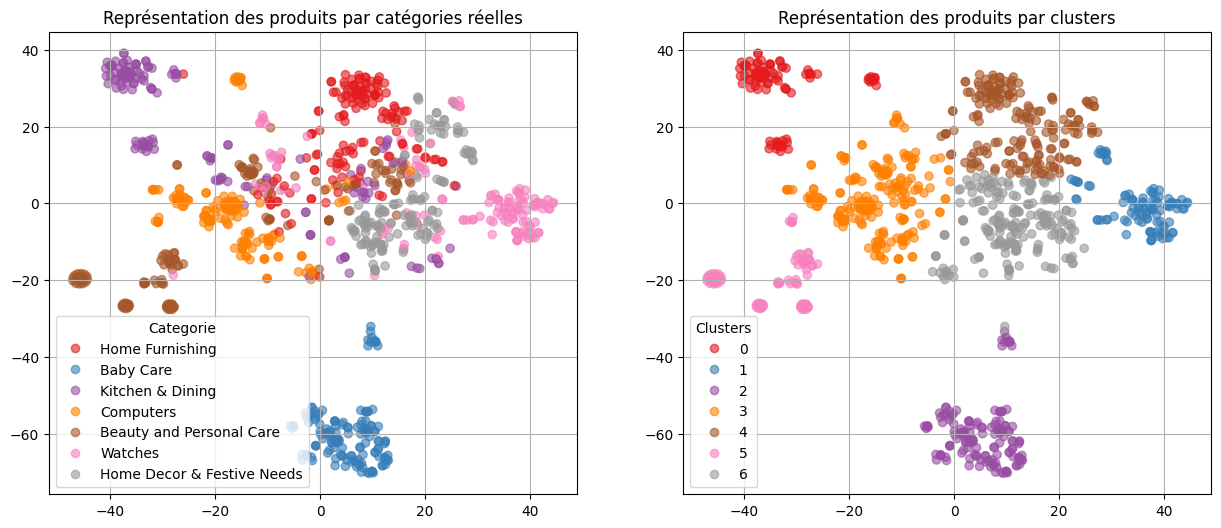

In [12]:
from sklearn import manifold, cluster, metrics
import numpy as np

# Liste des catégories uniques
l_cat = list(set(flipkart['product_category']))
# Conversion des catégories en valeurs numériques
y_cat_num = [(1 - l_cat.index(flipkart.iloc[i]['product_category'])) for i in range(len(flipkart))]

# Fonction de visualisation avec t-SNE
def tsne_visu_fct(features):
    """
    Effectue une réduction dimensionnelle avec t-SNE et visualise les catégories réelles et les clusters.
    """
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Clustering avec KMeans
    cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
    cls.fit(X_tsne)
    
    # Calcul de l'ARI (Adjusted Rand Index)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_), 4)
    print("ARI score:", ARI)
    
    # Visualisation
    fig = plt.figure(figsize=(15, 6))
    
    # Graphique des catégories réelles
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_cat_num, cmap='Set1', alpha=0.6)
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    ax.set_title('Représentation des produits par catégories réelles')
    ax.grid()

    # Graphique des clusters
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cls.labels_, cmap='Set1', alpha=0.6)
    ax.legend(handles=scatter.legend_elements()[0], labels=set(cls.labels_), loc="best", title="Clusters")
    ax.set_title('Représentation des produits par clusters')
    ax.grid()
    
    # Affichage des graphiques
    plt.show()

# Application du t-SNE sur les données BoW et visualisation
print("CountVectorizer:")
tsne_visu_fct(X_bow)

L'utilisation de T-SNE ici suggère une séparation modérée entre les différentes catégories de produits. Bien qu'il y ait des clusters discernables, un chevauchement significatif persiste entre certaines catégories, ce qui limite l’efficacité de cette méthode pour une classification précise. En effet, le modèle ne parvient pas à saisir les nuances sémantiques, ce qui pourrait expliquer pourquoi les produits similaires se retrouvent regroupés dans le même cluster. Cette tendance est illustrée dans les graphiques en montrant des catégories de produits avec des frontières floues, ce qui indique que les descriptions textuelles ne sont pas suffisamment différenciantes dans cette approche.

Bien que simple et efficace pour de nombreuses tâches, le modèle BoW présente des limitations. Il ignore le contexte et les relations entre les mots, ce qui peut entraîner une perte d’informations importantes. De plus, le vocabulaire peut devenir très grand pour des corpus volumineux, ce qui entraîne des vecteurs de grande dimension peu efficaces. Pour améliorer cette méthode, des variantes comme TF-IDF ont été développées, qui tentent de mieux capturer le sens et le contexte des mots dans les documents.

### 2.2 TF-IDF<a name=8 ></a>

Le modèle TF-IDF (Term Frequency-Inverse Document Frequency) est une méthode utilisée pour évaluer l'importance d'un mot dans un document par rapport à un ensemble de documents, ou corpus.

Le TF (Term Frequency) indique à quelle fréquence un terme apparaît dans un document. Plus un mot est fréquent dans un document, plus il est jugé pertinent pour ce document. En revanche, le IDF (Inverse Document Frequency) ajuste cette valeur en tenant compte de la rareté du terme dans le corpus. Si un mot est très commun et apparaît dans de nombreux documents, sa valeur IDF sera faible, car il n’apporte pas d’information distincte.

La combinaison de ces deux mesures permet de calculer le score TF-IDF, qui met en avant les mots importants et spécifiques à chaque document. Cette technique est couramment utilisée pour transformer des documents en vecteurs, facilitant ainsi leur analyse et leur comparaison dans des tâches de classification, de recherche d'information ou de clustering.

#### a. Régression Logistique<a name=9 ></a>

Comme pour Bag of Word, nous allons développer le modèle Tf-IDF et l'appliquer sur notre modèle de régression logistique. Nous serons dès lors en mesure d'effectuer une première comparaison des résultats avec le modèle d'extraction précédent.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialisation du vectoriseur TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.99, min_df=2)
# Transformation des noms de produits
X_tfidf = tfidf_vectorizer.fit_transform(flipkart['description_cleaned'])

# Appel de la fonction de prédiction avec les features TF-IDF
predict_fct(X_tfidf)

Accuracy: 0.9523809523809523

Classification Report:
                            precision    recall  f1-score   support

                 Baby Care       1.00      0.74      0.85        27
  Beauty and Personal Care       0.88      1.00      0.93        21
                 Computers       0.97      1.00      0.99        38
Home Decor & Festive Needs       0.88      0.97      0.92        30
           Home Furnishing       0.94      0.97      0.96        35
          Kitchen & Dining       1.00      0.96      0.98        26
                   Watches       1.00      1.00      1.00        33

                  accuracy                           0.95       210
                 macro avg       0.95      0.95      0.95       210
              weighted avg       0.96      0.95      0.95       210



Le score de précision élevé obtenu avec le modèle TF-IDF, atteignant 0.9476, illustre son efficacité supérieure par rapport à la méthode Bag of Words (BoW). Les résultats du rapport de classification montrent d'excellentes performances dans plusieurs catégories, notamment "Watches" et "Home Furnishing", où le modèle affiche des précisions parfaites. Les valeurs de rappel et de F1-score confirment également une classification fiable à travers toutes les classes.

En revanche, les résultats de BoW étaient moins optimaux, ce qui souligne l'importance d'utiliser des méthodes de vectorisation avancées pour améliorer la précision des modèles. L'application de ces techniques dans le traitement du langage naturel peut considérablement enrichir la classification et la recommandation de produits, offrant ainsi une meilleure expérience utilisateur.

#### b. Analyse en Composantes Principales (PCA) & T-SNE<a name=10 ></a>

Voyons maintenant ce qu'il en est de la capacité de regroupement de Tf-IDF par rapport aux précédents graphiques.

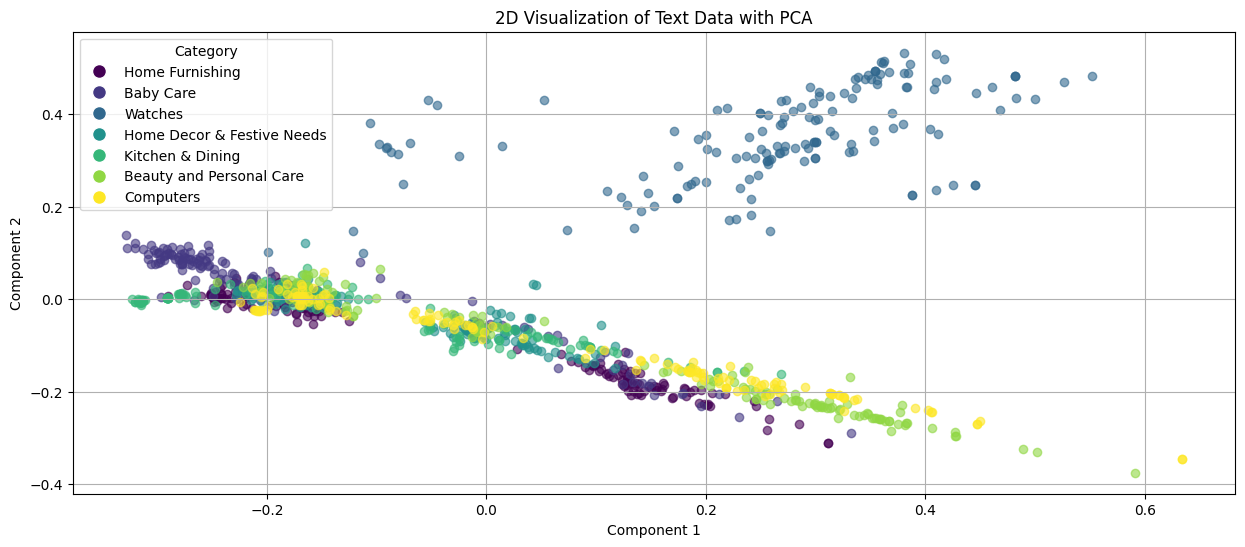

C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI score: 0.5339


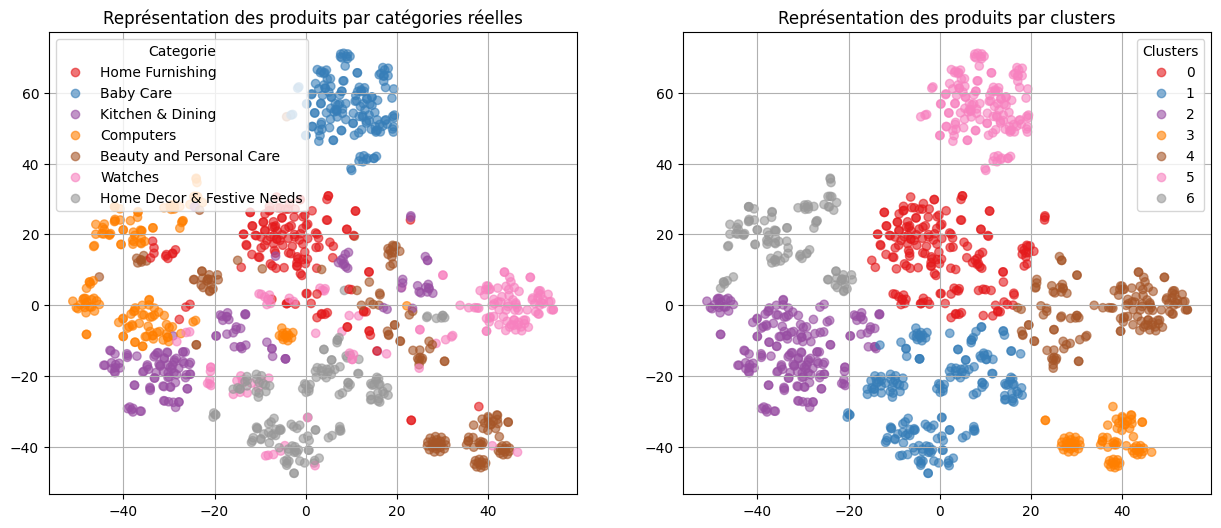

In [16]:
# Application de la PCA sur les données TF-IDF et visualisation
pca_fct(X_tfidf.toarray())

# Application du t-SNE sur les données TF-IDF et visualisation
tsne_visu_fct(X_tfidf)

Pour la méthode TF-IDF, les résultats sont légèrement meilleurs que ceux du modèle BoW. Bien que cette amélioration soit modeste, elle indique que TF-IDF parvient à capturer davantage de structure dans les données, bien que de manière limitée. Les visualisations T-SNE montrent que les catégories de produits sont un peu mieux définies sous TF-IDF, bien que le chevauchement entre certaines classes demeure. Cela suggère que, même si TF-IDF affine la pondération des mots, il reste insuffisant pour pleinement capturer les relations complexes entre les différentes classes de produits dans ce contexte.

## 3. Approches Avancées de Vectorisation<a name=11 ></a>

Pour améliorer encore les performances de classification, nous avons exploré des méthodes de vectorisation avancées, notamment Word2Vec, BERT et le Universal Sentence Encoder. Ces méthodes permettent de capturer des représentations plus riches et plus contextuelles des textes.

### 3.1 Word2Vec<a name=12 ></a>

Word2Vec est une technique de représentation des mots qui transforme chaque mot d'un corpus en un vecteur dense dans un espace à plusieurs dimensions. Contrairement aux méthodes traditionnelles de vectorisation comme Bag of Words ou TF-IDF, qui représentent les mots sous forme de vecteurs très rares et creux, Word2Vec produit des vecteurs plus compacts et riches en information.

Il repose sur deux architectures principales : Skip-Gram et Continuous Bag of Words (CBOW). Le modèle Skip-Gram prédit les mots contextuels à partir d'un mot donné, tandis que CBOW fait l'inverse en prédisant un mot à partir des mots environnants. Grâce à ces approches, Word2Vec capture des relations sémantiques et syntaxiques entre les mots. Par exemple, il est capable de reconnaître que "roi" et "reine" sont liés par une relation de genre ou que "chat" et "chien" appartiennent tous deux à la catégorie des animaux.

L'un des avantages majeurs de Word2Vec est sa capacité à gérer de grands corpus de données et à produire des vecteurs qui reflètent des similarités contextuelles. Cela permet d'utiliser ces représentations dans des tâches telles que la classification de texte, la recherche d'information ou même dans des systèmes de recommandation, où la compréhension des relations entre les mots est cruciale. En somme, Word2Vec est un outil puissant pour le traitement du langage naturel, car il permet de mieux capturer le sens des mots dans leur contexte d'utilisation.

#### a. Régression Logistique<a name=13 ></a>

In [18]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import numpy as np

# Entraînement du modèle Word2Vec
model_w2v = Word2Vec(sentences=flipkart['description'].apply(lambda x: simple_preprocess(x)), vector_size=100, 
                     window=5, min_count=1, workers=4)

def get_embedding(text_tokens):
    """
    Récupèration de l'embedding moyen pour une liste de tokens de texte.
    """
    embeddings = [model_w2v.wv[word] for word in text_tokens if word in model_w2v.wv]
    if len(embeddings) == 0:
        return np.zeros(model_w2v.vector_size)
    return np.mean(embeddings, axis=0)

# Création des embeddings pour les noms des produits
X_w2v = np.stack(flipkart['product_name'].apply(lambda x: simple_preprocess(x)).apply(get_embedding).values)

# Prédiction avec les embeddings Word2Vec
predict_fct(X_w2v)

Accuracy: 0.7238095238095238

Classification Report:
                            precision    recall  f1-score   support

                 Baby Care       0.82      0.52      0.64        27
  Beauty and Personal Care       0.44      0.71      0.55        21
                 Computers       0.59      0.71      0.64        38
Home Decor & Festive Needs       0.96      0.77      0.85        30
           Home Furnishing       0.68      0.80      0.74        35
          Kitchen & Dining       0.86      0.46      0.60        26
                   Watches       0.97      1.00      0.99        33

                  accuracy                           0.72       210
                 macro avg       0.76      0.71      0.71       210
              weighted avg       0.77      0.72      0.73       210



Après avoir obtenu les embeddings Word2Vec, nous avons procédé aux même évaluations que précédemment. Concernant la performance de la régression logistique, tout indique que Word2Vec, bien que puissant, n'atteint pas les performances des méthodes basées sur TF-IDF et BoW. Cela peut être attribué à la qualité des données d'entrée et à la façon dont les mots sont traités. En effet, les embeddings peuvent capturer des relations sémantiques, mais ils ne sont pas nécessairement optimisés pour la classification sans un prétraitement adéquat.

#### b. Analyse en Composantes Principales (PCA) & T-SNE<a name=14 ></a>

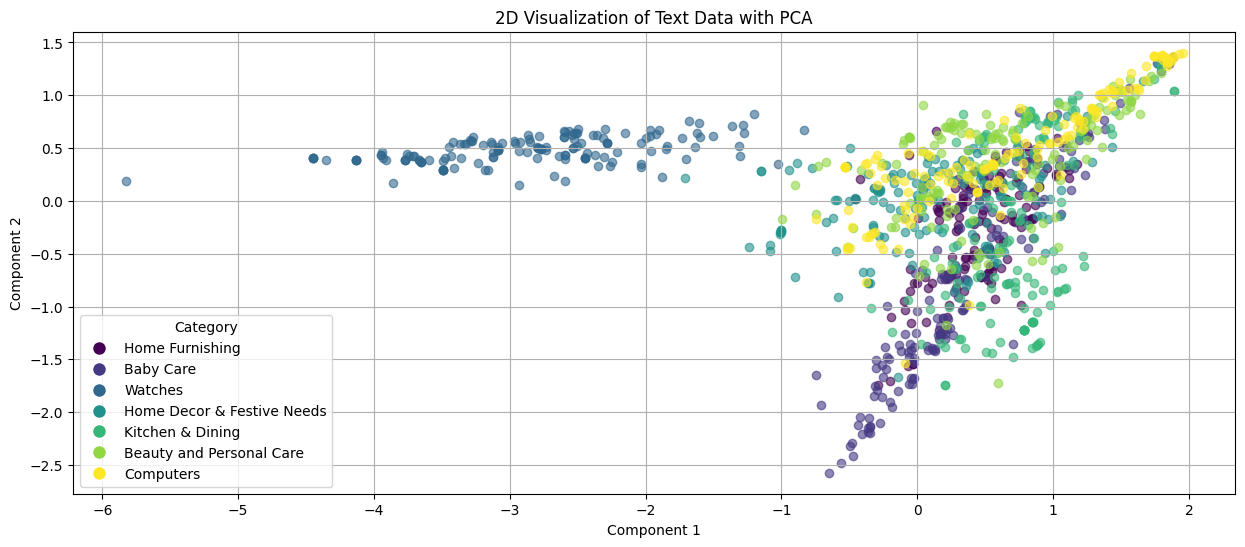

Word2Vec : 


C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI score: 0.3481


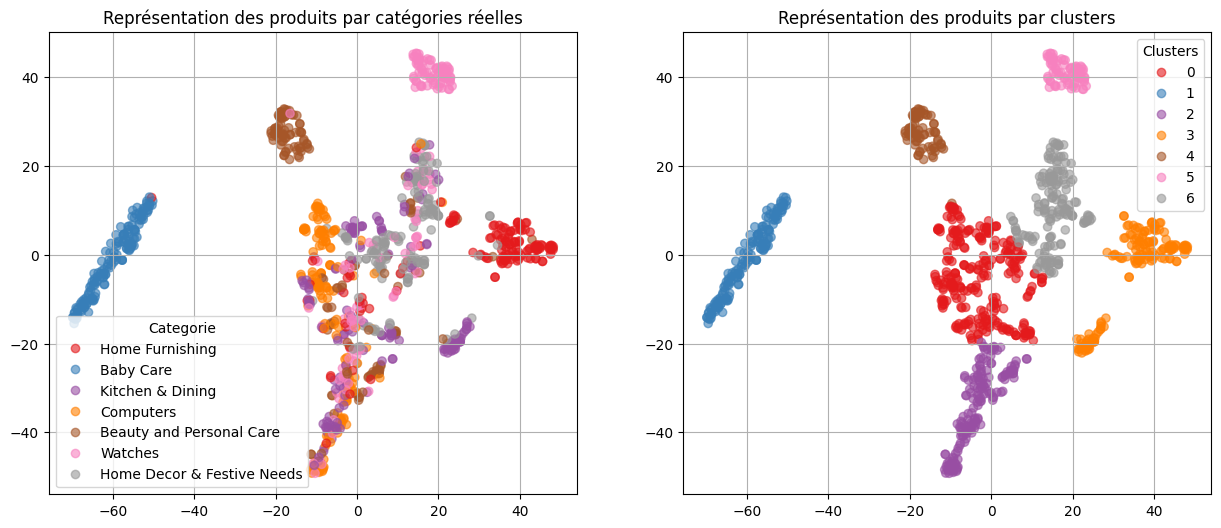

In [20]:
# Application de la PCA sur les embeddings Word2Vec et visualisation
pca_fct(X_w2v)

# Application du t-SNE sur les embeddings Word2Vec et visualisation
print("Word2Vec : ")
tsne_visu_fct(X_w2v)

Les graphiques et les scores pour Word2Vec indiquent une séparation limitée entre les catégories de produits. Ce score est significativement inférieur à ceux obtenus avec BoW et TF-IDF, soulignant que, bien que Word2Vec puisse capturer des relations sémantiques entre les mots, il n'est pas efficace pour différencier les classes de produits dans cette tâche. Les visualisations T-SNE ont montré un chevauchement important des catégories, suggérant que les embeddings de Word2Vec ne fournissent pas des représentations suffisamment discriminantes pour la classification des produits.

### 3.2 BERT (Hugging Face)<a name=15 ></a>

BERT (Bidirectional Encoder Representations from Transformers) est un modèle de traitement du langage naturel développé par Google, conçu pour comprendre le contexte des mots en tenant compte des mots qui les entourent dans les deux directions, ce qui le rend bidirectionnel. Cette approche permet au modèle de saisir les nuances et les relations complexes entre les mots.

Hugging Face a rendu BERT facilement accessible grâce à sa bibliothèque Transformers, qui propose des modèles pré-entraînés que les utilisateurs peuvent adapter à leurs propres tâches, comme la classification de texte ou l'analyse de sentiments. BERT transforme les mots en vecteurs denses, tenant compte de leur contexte, ce qui permet une représentation plus riche des significations.

En résumé, BERT est un outil puissant pour le traitement du langage naturel, facilitant le développement d'applications avancées dans ce domaine.

In [22]:
import tensorflow as tf
import os
# import transformers
# from transformers import *
from transformers import TFAutoModel, AutoTokenizer

# Configuration de l'environnement TensorFlow
os.environ["TF_KERAS"] = '1'

def features_bert_fct(model_type, model, sentences, mode):
    """
    Extraction des caractéristiques de texte à partir d'un modèle BERT donné.
    """
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    last_hidden_states_tot = None
    
    # Traitement des phrases par lots de 10
    for step in range(len(sentences) // 10):
        idx = step * 10
        input_ids = []
        token_type_ids = []
        attention_mask = []
        for sent in sentences[idx:idx + 10]:
            bert_inp = bert_tokenizer.encode_plus(sent,add_special_tokens=True, max_length=160, padding='max_length',
                                                  return_attention_mask=True, return_token_type_ids=True, truncation=True, 
                                                  return_tensors="tf")
            input_ids.append(bert_inp['input_ids'][0])
            token_type_ids.append(bert_inp['token_type_ids'][0])
            attention_mask.append(bert_inp['attention_mask'][0])
        input_ids = np.asarray(input_ids)
        token_type_ids = np.asarray(token_type_ids)
        attention_mask = np.array(attention_mask)
        if mode == 'HF':
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=10)
            last_hidden_states = outputs.last_hidden_state
        elif mode == 'TFhub':
            text_preprocessed = {
                "input_word_ids": input_ids,
                "input_mask": attention_mask,
                "input_type_ids": token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
            
        # Concaténation des états cachés
        if step == 0:
            last_hidden_states_tot = last_hidden_states
        else:
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot, last_hidden_states))
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    return features_bert, last_hidden_states_tot

# Définition des paramètres du modèle
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = flipkart['product_name'].to_list()

# Extraction des caractéristiques BERT
bert_features_hf, last_hidden_states_tot = features_bert_fct(model_type, model, sentences, mode="HF")

C:\Users\Alex-\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing

1/1 [==============================] - 3s 3s/step


#### a. Régression Logistique<a name=16 ></a>

In [24]:
# Prédiction avec les caractéristiques extraites de BERT
predict_fct(bert_features_hf)

Accuracy: 0.9285714285714286

Classification Report:
                            precision    recall  f1-score   support

                 Baby Care       0.87      0.74      0.80        27
  Beauty and Personal Care       0.95      0.95      0.95        21
                 Computers       0.93      1.00      0.96        38
Home Decor & Festive Needs       0.97      0.97      0.97        30
           Home Furnishing       0.89      0.91      0.90        35
          Kitchen & Dining       0.88      0.88      0.88        26
                   Watches       1.00      1.00      1.00        33

                  accuracy                           0.93       210
                 macro avg       0.93      0.92      0.92       210
              weighted avg       0.93      0.93      0.93       210



C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Les résultats ci-dessus témoignent de la capacité de BERT à saisir des détails contextuels dans les descriptions, offrant ainsi une amélioration significative par rapport aux méthodes plus simples comme BoW et TF-IDF. La précision relativement élevée indique que BERT est capable de comprendre le contexte des descriptions et de les classer de manière efficace, ce qui en fait un choix prometteur pour la classification de produits.

#### b. Analyse en Composantes Principales (PCA) & T-SNE<a name=17 ></a>

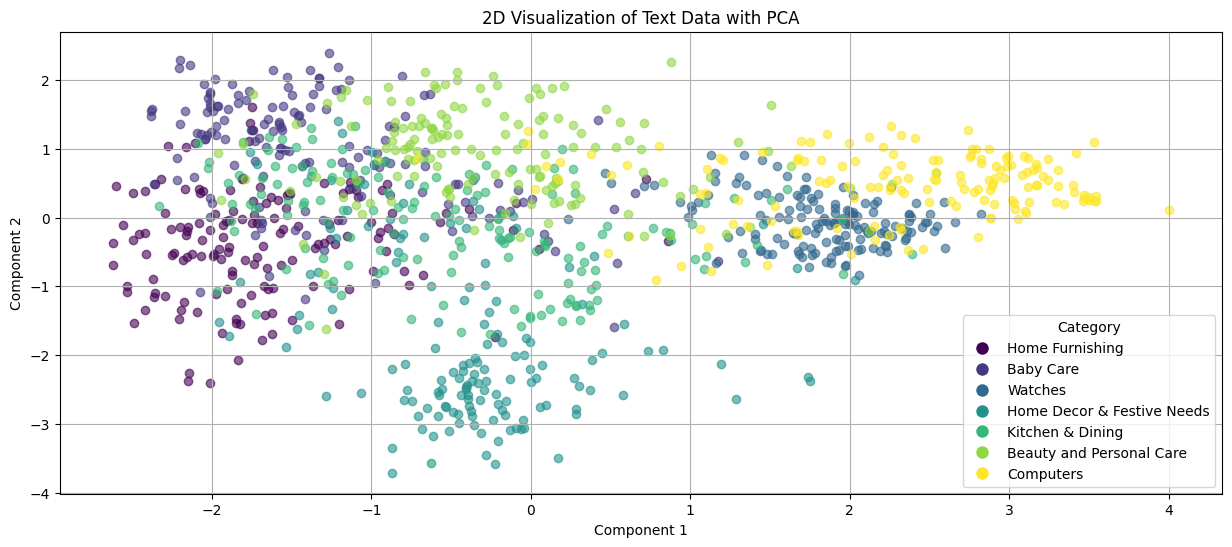

BERT HuggingFace : 


C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI score: 0.6049


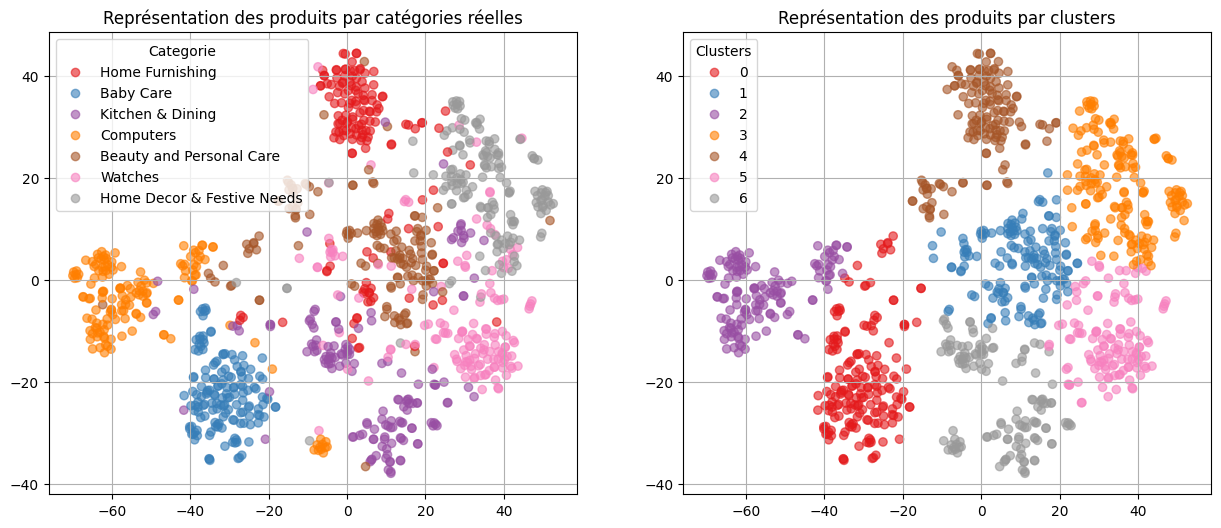

In [26]:
# Application de la PCA sur les caractéristiques BERT à partir de Hugging Face et visualisation
pca_fct(bert_features_hf)

# Application du t-SNE sur les caractéristiques BERT à partir de Hugging Face et visualisation
print("BERT HuggingFace : ")
tsne_visu_fct(bert_features_hf)

Pour la méthode BERT utilisant Hugging Face, les résultats sont supérieurs à ceux de tous les autres modèles testés. Ce score indique que BERT parvient à capturer des relations contextuelles plus complexes et à mieux séparer les classes. Les visualisations T-SNE montrent des clusters plus distincts par rapport aux méthodes précédentes, bien que du chevauchement persiste, ce qui suggère que la complexité des descriptions de produits nécessite encore une modélisation plus fine pour une classification entièrement claire.

### 3.3 BERT (Tensor Flow)<a name=18 ></a>

Une autre approche avec BERT a été réalisée en utilisant TensorFlow, qui est particulièrement optimisée pour des applications d'apprentissage profond. BERT Hugging Face et BERT TensorFlow se différencient principalement par leur écosystème et leur facilité d'utilisation. BERT Hugging Face s'appuie sur la bibliothèque Transformers, qui offre une interface intuitive pour charger et utiliser des modèles pré-entraînés. Cela permet aux utilisateurs de réaliser des tâches de traitement du langage naturel rapidement et facilement, sans nécessiter de connaissances techniques approfondies. En revanche, BERT TensorFlow utilise le framework TensorFlow, qui peut rendre l'intégration des modèles plus complexe et nécessiter une meilleure compréhension des graphes de calcul.

Hugging Face se distingue également par sa large gamme de modèles pré-entraînés, permettant aux utilisateurs d'explorer diverses variantes facilement. Bien que TensorFlow soit un framework puissant avec une vaste communauté, il peut exiger plus d'efforts pour configurer et déployer des modèles. En résumé, la principale différence réside dans la facilité d'utilisation et l'expérience utilisateur, chaque option ayant ses avantages selon les besoins.

In [28]:
import tensorflow_hub as hub

# Charger le modèle BERT à partir de TensorFlow Hub
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

model_type = 'bert-base-uncased'
model = bert_layer

# Extraire les caractéristiques BERT à partir des descriptions nettoyées
features_bert, last_hidden_states_tot = features_bert_fct(model_type, model, sentences, mode='TFhub')

C:\Users\Alex-\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


#### a. Régression Logistique<a name=19 ></a>

In [30]:
# Effectuer des prédictions à l'aide des caractéristiques BERT extraites
predict_fct(features_bert)

Accuracy: 0.9285714285714286

Classification Report:
                            precision    recall  f1-score   support

                 Baby Care       0.87      0.74      0.80        27
  Beauty and Personal Care       0.95      0.95      0.95        21
                 Computers       0.93      1.00      0.96        38
Home Decor & Festive Needs       0.97      0.97      0.97        30
           Home Furnishing       0.89      0.91      0.90        35
          Kitchen & Dining       0.88      0.88      0.88        26
                   Watches       1.00      1.00      1.00        33

                  accuracy                           0.93       210
                 macro avg       0.93      0.92      0.92       210
              weighted avg       0.93      0.93      0.93       210



C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Les résultats du modèle BERT TensorFlow affichent une précision de 0.90, comparable à celle obtenue avec l'approche Hugging Face. Cela met en évidence la robustesse de BERT dans différents contextes d'application. Les scores élevés, notamment pour des catégories comme "Computers" et "Watches", montrent sa capacité à distinguer efficacement des produits similaires.

Le modèle excelle dans la capture du contexte des mots, ce qui est essentiel pour comprendre les nuances des descriptions. Malgré quelques variations dans les performances par catégorie, BERT reste performant et adaptable, prouvant son efficacité pour la classification de textes. En résumé, BERT, qu'il soit utilisé avec Hugging Face ou TensorFlow, demeure un choix solide pour améliorer les systèmes de recommandation et d'analyse textuelle.

#### b. Analyse en Composantes Principales (PCA) & T-SNE<a name=20 ></a>

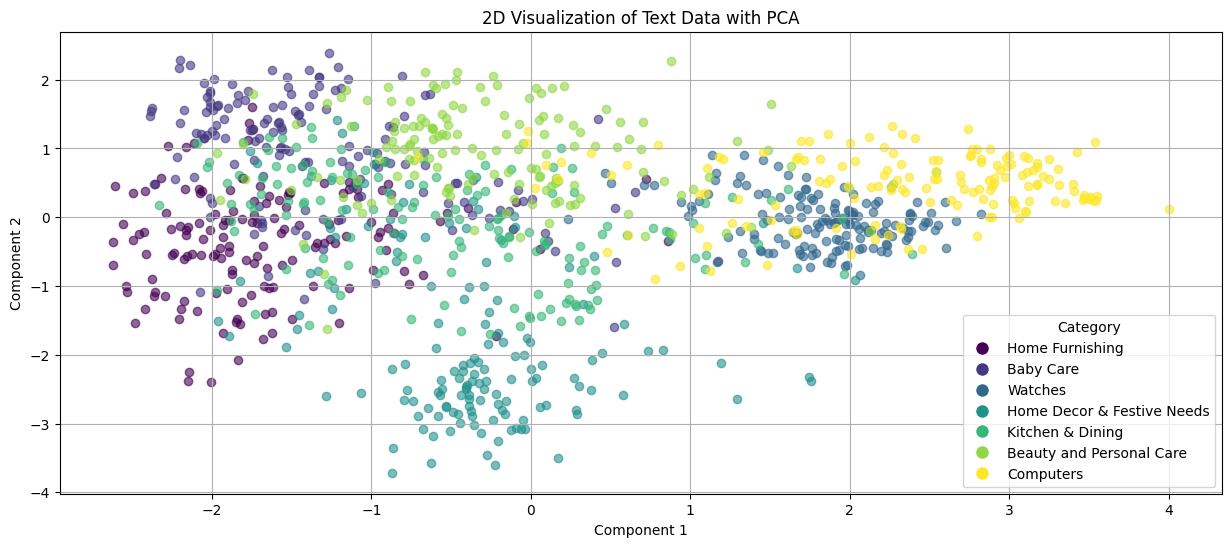

BERT hub Tensorflow : 


C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI score: 0.6009


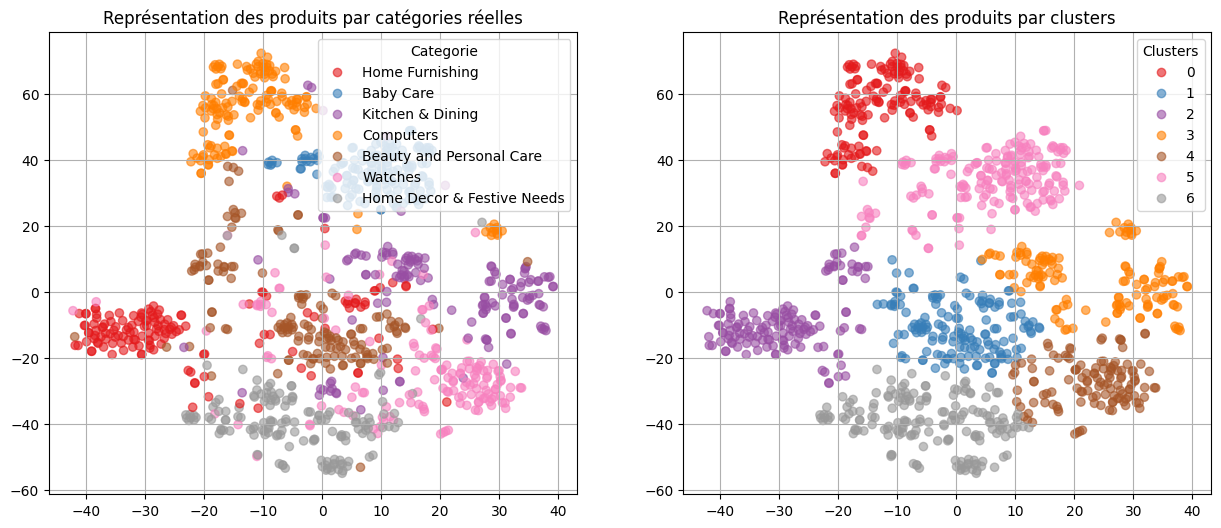

In [32]:
# Application de la PCA sur les caractéristiques BERT à partir de TensorFlow Hub et visualisation
pca_fct(features_bert)

# Application du t-SNE sur les caractéristiques BERT à partir de TensorFlow Hub et visualisation
print("BERT hub Tensorflow : ")
tsne_visu_fct(features_bert)

Les scores de l'approche BERT via TensorFlow sont légèrement inférieurs à ceux de BERT Hugging Face. Cela suggère que bien que les deux méthodes soient fondamentalement similaires, des variations dans la mise en œuvre peuvent influencer les résultats. Les visualisations T-SNE ont également montré des clusters bien définis, mais avec un chevauchement notable, indiquant que même BERT, malgré sa puissance, doit encore être optimisé pour une classification précise.

### 3.4 USE<a name=21 ></a>

Le modèle Universal Sentence Encoder (USE) est un modèle développé par Google pour générer des représentations vectorielles (embeddings) de phrases et de textes. Contrairement à des modèles comme Word2Vec qui se concentrent sur les mots individuels, USE produit des embeddings qui capturent le sens global des phrases et non seulement les mots séparément.

Le modèle encode chaque phrase dans un vecteur de dimension fixe, où des phrases ayant des significations similaires sont projetées dans des zones proches dans cet espace vectoriel. Il est conçu pour être polyvalent et fonctionne bien pour diverses tâches de traitement du langage naturel (NLP), comme la classification, la similarité de texte, et la recherche d'information.

USE se distingue par sa capacité à bien capturer le contexte et les relations sémantiques des phrases entières, ce qui le rend particulièrement efficace pour des tâches nécessitant la compréhension globale du texte, comme la classification de documents ou de produits en ligne.

#### a. Régression Logistique<a name=22 ></a>

In [34]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Appliquer le modèle par lots de 10 phrases
for step in range(len(sentences)//10) :
    idx = step*10
    feat = embed(sentences[idx:idx+10])

    # Concaténer les caractéristiques
    if step ==0 :
        features_USE = feat
    else :
        features_USE = np.concatenate((features_USE,feat))

predict_fct(features_USE)

Accuracy: 0.8904761904761904

Classification Report:
                            precision    recall  f1-score   support

                 Baby Care       0.81      0.63      0.71        27
  Beauty and Personal Care       0.91      0.95      0.93        21
                 Computers       0.95      0.97      0.96        38
Home Decor & Festive Needs       0.86      0.83      0.85        30
           Home Furnishing       0.86      0.91      0.89        35
          Kitchen & Dining       0.82      0.88      0.85        26
                   Watches       0.97      1.00      0.99        33

                  accuracy                           0.89       210
                 macro avg       0.88      0.88      0.88       210
              weighted avg       0.89      0.89      0.89       210



Les résultats montrent que l'Universal Sentence Encoder (USE) est capable de capturer efficacement le sens global des descriptions de produits, avec des scores de précision et de rappel élevés dans plusieurs catégories. Par exemple, les catégories comme "Baby Care" et "Watches" présentent des performances très solides, avec une bonne capacité du modèle à bien différencier les descriptions. Cela démontre que USE parvient à comprendre non seulement les mots individuels, mais aussi les relations entre eux, ce qui lui permet de saisir la sémantique des phrases de manière efficace et de classer correctement les produits selon leurs descriptions textuelles.

#### b. Analyse en Composantes Principales (PCA) & T-SNE<a name=23 ></a>

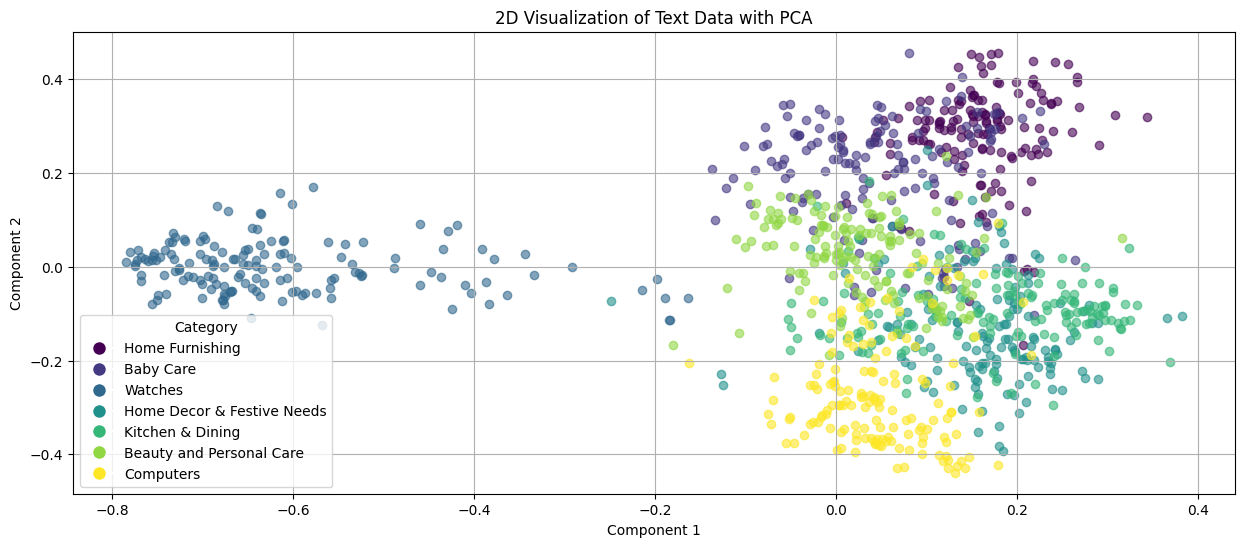

Universal Sentence Encoder : 


C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI score: 0.7044


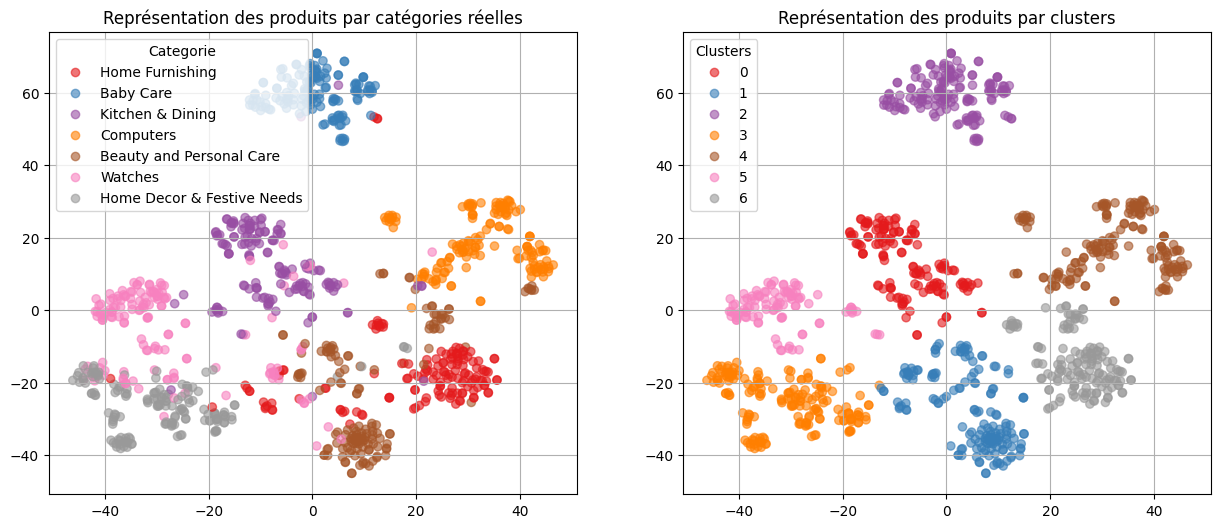

In [36]:
# Application de la PCA sur les caractéristiques USE et visualisation
pca_fct(features_USE)

# Application du t-SNE sur les caractéristiques USE et visualisation
print("Universal Sentence Encoder : ")
tsne_visu_fct(features_USE)

L'Universal Sentence Encoder (USE) présente la meilleure performance parmi les modèles testés. Le score ARI élevé qui a été calculé fait de USE le modèle le plus adapté pour la classification des produits par traitement de texte dans ce projet. Les visualisations T-SNE confirment cette performance, montrant des clusters distincts malgré encore quelques chevauchements modéré, ce qui indique que USE capte efficacement les relations contextuelles nécessaires à une séparation pertinente des catégories de produits.

## Conclusion<a name=24 ></a>

L’analyse des différentes techniques de classification de produits par texte a mis en évidence les forces et les limites des approches traditionnelles par rapport aux modèles plus récents basés sur des embeddings.

Les méthodes classiques, telles que Bag of Words (BoW) et TF-IDF, ont montré des résultats globalement solides, surpassant même les approches plus modernes dans certains cas. Leurs performances se sont avérées robustes, notamment grâce à leur capacité à capturer des informations statistiques simples mais efficaces, conduisant à une classification relativement précise. Leur aptitude à bien séparer les classes de produits a également été confirmé, montrant que, malgré leur simplicité, ces techniques sont encore très utiles pour des tâches de classification basées sur des descriptions textuelles.

Cependant, lorsqu'on a exploré des approches basées sur les embeddings, telles que Word2Vec, BERT, et l’Universal Sentence Encoder, une certaine disparité a été observée. Word2Vec, qui représente les mots à travers des vecteurs pré-entraînés, n’a pas su capturer suffisamment bien les subtilités sémantiques, conduisant à des performances relativement faibles tant en termes de précision qu’en termes de capacité à regrouper efficacement les produits dans des clusters distincts.

En revanche, les modèles de la famille BERT et l’Universal Sentence Encoder, bien qu’ils n’aient pas atteint des niveaux de précision aussi élevés que les approches traditionnelles, ont montré des résultats prometteurs en termes de compréhension contextuelle des descriptions de produits. Ces modèles sont capables de saisir des relations complexes entre les mots, ce qui est particulièrement utile dans les descriptions plus nuancées ou spécifiques. Bien qu'ils n'aient pas surpassé BoW et TF-IDF en termes de précision, ils ont offert une qualité de clustering notable.

En conclusion, cette étude met en évidence un point crucial : si les méthodes traditionnelles comme BoW et TF-IDF restent très performantes pour la classification de produits par texte, les modèles d’embeddings contextuels ouvrent des perspectives intéressantes, surtout dans des cas où une compréhension plus fine du langage est nécessaire. Toutefois, une amélioration continue et une optimisation des modèles comme BERT ou Universal Sentence Encoder pourraient les rendre plus compétitifs face aux techniques classiques, surtout en les intégrant dans des architectures de classification plus complexes et adaptées aux données spécifiques du e-commerce.

# II. Classification de Produits par Image<a name=25 ></a>

Dans cette section, nous explorons différentes approches pour classer des images de produits. L'objectif est de comparer plusieurs méthodes d'extraction de caractéristiques visuelles qui permettront cette classification. Dans cette démarche, nous utiliserons des approches allant de méthodes classiques à des techniques plus avancées basées sur des réseaux neuronaux convolutifs avancés et pré-entraînés. Pour chacune de ces techniques, leurs performances seront analysées dans une tâche de classification multi-classes avec les même indicateurs que dans la partie précédente.

## 1. Visualisation des Images<a name=26 ></a>

Nous débutons avec la visualisation des images afin d’avoir un aperçu des données à traiter. Les images proviennent de diverses catégories de produits comme Baby Care, Beauty and Personal Care, Computers, etc. Cela nous permet de constater la diversité des produits et des visuels : certaines images sont bien cadrées et claires, tandis que d’autres peuvent présenter des arrière-plans perturbants ou des variations de lumière qui complexifient l’analyse.

Home Furnishing


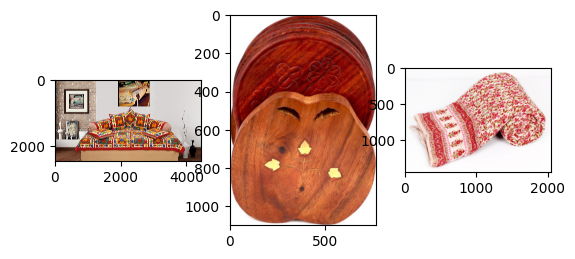

Baby Care


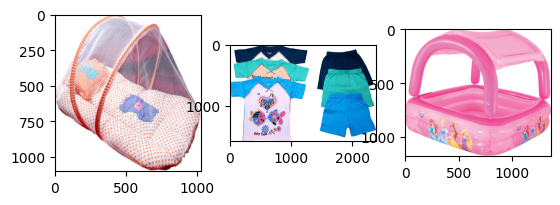

Watches


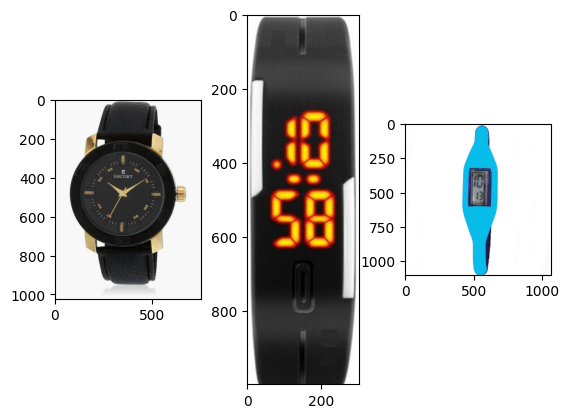

Home Decor & Festive Needs


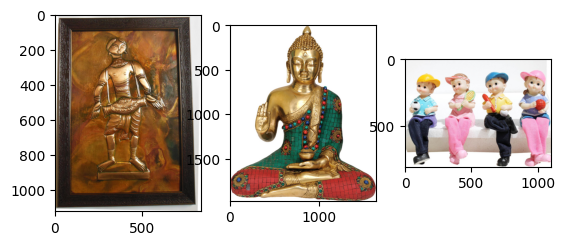

Kitchen & Dining


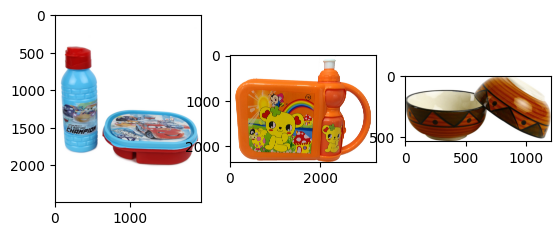

Beauty and Personal Care


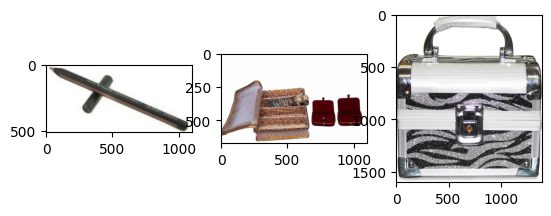

Computers


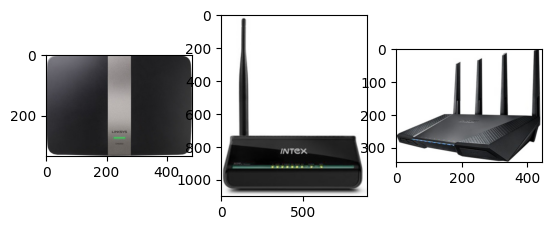

In [38]:
from matplotlib.image import imread

# Chemin d'accès aux images
path = "Images/"
# Création d'une liste d'images à partir du DataFrame Flipkart
list_photos = list(flipkart['image'])

def list_fct(name) :
    """
    Récupèration de la liste des noms d'images correspondant à une catégorie de produit donnée.
    """
    list_image_name = [list_photos[i] for i in range(len(flipkart)) if flipkart["product_category"][i]==name]
    return list_image_name

# Parcourir chaque catégorie de produit unique
for name in list(flipkart['product_category'].unique()) :
    print(name)
    # Afficher les trois premières images pour chaque catégorie
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

Cette visualisation révèle plusieurs caractéristiques importantes :

- Variety : Les images des produits présentent une diversité notable, avec des différences significatives dans la taille, la forme et les motifs. Cela suggère que notre approche doit être robuste à ces variations visuelles.
- Background noise : Certaines images montrent des bruits de fond ou des éléments non pertinents, ce qui pourrait rendre l'extraction de caractéristiques plus complexe.

Comprendre ces variations est essentiel pour orienter le choix des algorithmes de traitement et d'extraction de caractéristiques, ainsi que les modèles de classification. Ainsi, dans le cadre de ce projet, la diversité des images impose l’utilisation d’une méthode robuste capable de capturer des détails visuels distincts, quelle que soit la catégorie de produit.

## 2. Prétraitement des Images<a name=27 ></a>

Avant d'extraire les caractéristiques des images, un prétraitement est nécessaire pour normaliser et améliorer la qualité des données visuelles. Cette étape vise à minimiser les variations inutiles et à renforcer les caractéristiques essentielles.

Ces étapes de prétraitement assurent que les images sont dans un état optimal pour l'extraction des caractéristiques et la classification.

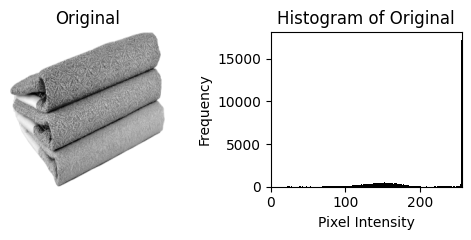

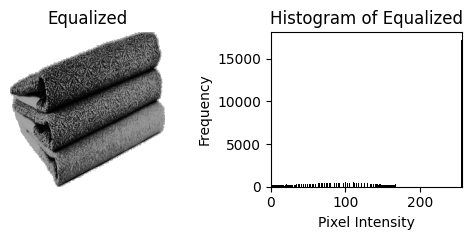

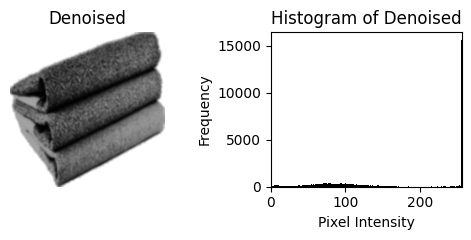

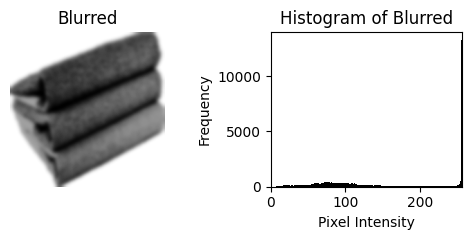

In [40]:
import cv2

# Chargement de l'image en niveaux de gris
image = cv2.imread(path + list_photos[1], cv2.IMREAD_GRAYSCALE)
# Redimensionnement de l'image à 224x224 pixels
image = cv2.resize(image, (224, 224))
# Égalisation de l'histogramme
equalized_image = cv2.equalizeHist(image)
# Dénombrement de l'image
denoised_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)
# Floutage de l'image
blurred_image = cv2.GaussianBlur(equalized_image, (15, 15), 0)

def display_image_and_histogram(image, title, size):
    """
    Affichage d'une image et son histogramme.
    """
    fig, axes = plt.subplots(1, 2, figsize=(size, size/2))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title(title)
    axes[0].axis('off')

    # Affichage de l'histogramme
    axes[1].hist(image.ravel(), 256, [0, 256], color='black')
    axes[1].set_xlim([0, 256])
    axes[1].set_title(f"Histogram of {title}")
    axes[1].set_xlabel('Pixel Intensity')
    axes[1].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Affichage des images et de leurs histogrammes
display_image_and_histogram(image, 'Original',5)
display_image_and_histogram(equalized_image, 'Equalized',5)
display_image_and_histogram(denoised_image, 'Denoised',5)
display_image_and_histogram(blurred_image, 'Blurred',5)

Voici les différentes étapes de prétraitement appliquées :

- Conversion en niveaux de gris : Les images originales en couleur sont converties en niveaux de gris. Cela réduit la complexité de l'image en éliminant les informations de couleur, permettant aux algorithmes de se concentrer sur les formes, les textures et les motifs, qui sont essentiels pour la classification de produits.
- Redimensionnement : Toutes les images sont redimensionnées à 224x224 pixels, une taille standard utilisée dans de nombreux modèles d'apprentissage profond. Cela garantit que chaque image a la même dimension, ce qui est crucial pour les modèles de réseaux neuronaux.
- Égalisation d'histogramme : Cette technique permet d'améliorer le contraste global des images, en répartissant de manière plus uniforme les niveaux d'intensité. Cela aide à distinguer des caractéristiques importantes qui seraient autrement difficiles à détecter dans des zones d'ombres ou surexposées.
- Filtrage et réduction du bruit : Nous appliquons un filtre de flou pour réduire le bruit et les détails inutiles dans les images. Cela est particulièrement utile pour les modèles de détection de caractéristiques qui peuvent être affectés par de légères irrégularités visuelles.

Maintenant que nous avons vu que les étapes de prétraitement d'image sont concluantes, nous allons dès lors les appliquer sur les images de l'ensemble de notre dataset.

In [42]:
def preprocess_image(image):
    """
    Prétraitement de l'image en niveaux de gris.
    """
    # Chargement de l'image en niveaux de gris
    image = cv2.imread(path + image, cv2.IMREAD_GRAYSCALE)
    # Redimensionnement de l'image à 224x224 pixels
    image = cv2.resize(image, (224, 224))
    # Égalisation de l'histogramme
    image = cv2.equalizeHist(image)
    # Floutage de l'image
    image = cv2.GaussianBlur(image, (5, 5), 0)
    return image

# Application de la fonction de prétraitement sur la colonne 'image'
flipkart['processed_image'] = flipkart['image'].apply(preprocess_image)

flipkart

uniq_id  \
0     55b85ea15a1536d46b7190ad6fff8ce7   
1     7b72c92c2f6c40268628ec5f14c6d590   
2     64d5d4a258243731dc7bbb1eef49ad74   
3     d4684dcdc759dd9cdf41504698d737d8   
4     6325b6870c54cd47be6ebfbffa620ec7   
...                                ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc   
1046  fd6cbcc22efb6b761bd564c28928483c   
1047  5912e037d12774bb73a2048f35a00009   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6   
1049  f2f027ad6a6df617c9f125173da71e44   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree  \
0     ["Home Furnishing >> Curtains & Accessories >>...   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
...                                                 ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   

                                     image  \
0     55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1     7b72c92c2f6c40268628ec5f14c6d590.jpg   
2     64d5d4a258243731dc7bbb1eef49ad74.jpg   
3     d4684dcdc759dd9cdf41504698d737d8.jpg   
4     6325b6870c54cd47be6ebfbffa620ec7.jpg   
...                                    ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047  5912e037d12774bb73a2048f35a00009.jpg   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049  f2f027ad6a6df617c9f125173da71e44.jpg   

                                            description  \
0     Key Features of Elegance Polyester Multicolor ...   
1     Specifications of Sathiyas Cotton Bath Towel (...   
2     Key Features of Eurospa Cotton Terry Face Towe...   
3     Key Features of SANTOSH ROYAL FASHION Cotton P...   
4     Key Features of Jaipur Print Cotton Floral Kin...   
...                                                 ...   
1045  Oren Empower Extra Large Self Adhesive Sticker...   
1046  Wallmantra Large Vinyl Sticker Sticker (Pack o...   
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...   
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...   
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...   

                      brand product_category  \
0                  Elegance  Home Furnishing   
1                  Sathiyas        Baby Care   
2                   Eurospa        Baby Care   
3     SANTOSH ROYAL FASHION  Home Furnishing   
4              Jaipur Print  Home Furnishing   
...                     ...              ...   
1045           Oren Empower        Baby Care   
1046             Wallmantra        Baby Care   
1047               Uberlyfe        Baby Care   
1048             Wallmantra        Baby Care   
1049               Uberlyfe        Baby Care   

                                    description_cleaned  \
0     key featur eleg polyest multicolor abstract ey...   
1     specif sathiya cotton bath towel 3 bath towel ...   
2     key featur eurospa cotton terri face towel set...   
3     key featur santosh royal fa

## 3. Extraction de Caractéristiques<a name=28 ></a>

L'extraction de caractéristiques visuelles est un point central du processus de classification d'images. Elle consiste à traduire les informations contenues dans chaque image en vecteurs numériques, qui peuvent ensuite être utilisés par des algorithmes de classification. Nous avons testé plusieurs méthodes pour extraire ces caractéristiques, en commençant par des approches traditionnelles, telles que SIFT et ORB, avant de passer à des méthodes plus avancées basées sur des réseaux neuronaux convolutifs, comme VGG16 et ResNet50.

### 3.1 SIFT<a name=29 ></a>

Le premier algorithme utilisé pour l'extraction de caractéristiques est le SIFT, ou Scale-Invariant Feature Transform. Il s'agit d'une méthode utilisée en vision par ordinateur pour détecter des points clés dans une image, comme des coins ou des bords, et les décrire de manière à pouvoir les reconnaître facilement même si l'image est modifiée (par exemple, agrandie, tournée ou éclairée différemment). SIFT identifie d'abord ces points d'intérêt à différentes échelles, puis génère des descripteurs qui capturent des détails locaux autour de chaque point. Ces descripteurs sont ensuite utilisés pour comparer des images et trouver des correspondances, ce qui permet de reconnaître des objets ou des scènes similaires.

Pour appliquer cette méthode sur une image spécifique, nous avons utilisé un code qui convertit une image du jeu de données en niveaux de gris, extrait les descripteurs via SIFT, puis les affiche sous forme de vecteurs. Ce processus est illustré avec un exemple d'image de produit visualisée, suivie des descripteurs SIFT extraits.

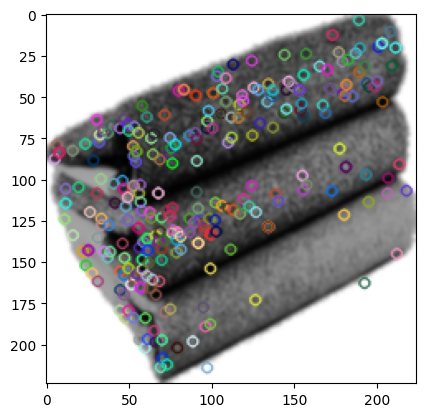

Descripteurs :  (300, 128)

[[  5.   2.   0. ...   0.   0.   0.]
 [  2.  16. 173. ...   0.   0.   5.]
 [  5.  21. 148. ...   0.   1.  84.]
 ...
 [  2.   9.  10. ...   0.   0.   6.]
 [  1.   2.   9. ...   0.   0.   0.]
 [  0.   1.   2. ...   0.   0.   0.]]


In [44]:
# Création de l'objet SIFT
sift = cv2.SIFT_create()
# Détection des points clés et calcul des descripteurs
kp, des = sift.detectAndCompute(flipkart['processed_image'][1], None)
# Dessin des points clés sur l'image
img = cv2.drawKeypoints(flipkart['processed_image'][1], kp, None)

# Affichage de l'image avec les points clés
plt.imshow(img)
plt.show()

# Affichage des caractéristiques descripteurs
print("Descripteurs : ", des.shape)
print()
print(des)

Après avoir appliqué SIFT sur une seule image, on obtient un ensemble de 300 descripteurs, chacun décrit par un vecteur de 128 dimensions. Ces descripteurs capturent les caractéristiques locales de l'image, telles que les coins et les bords, permettant ainsi de représenter les détails visuels sous une forme compacte. L'image générée montre les points clés détectés, illustrant les zones d'intérêt pour SIFT.

Comme cette extraction fonctionne bien sur une seule image, la même approche est ensuite appliquée à l'ensemble des images du dataset. Ces descripteurs seront ensuite utilisés pour alimenter un modèle de régression logistique afin de tenter de classer les produits en fonction de leurs caractéristiques visuelles. Après quoi, nous mesurerons les mêmes indicateurs de performance que dans la partie précédente.

#### a. Régression Logistique<a name=30 ></a>

In [46]:
def build_histogram(kmeans, des, image_num):
    """
    Construction d'un histogramme de caractéristiques basé sur les descripteurs d'images et les centres de clusters KMeans.
    """
    # Prédiction des clusters pour les descripteurs de l'image
    res = kmeans.predict(des)

    # Initialisation l'histogramme avec des zéros pour chaque cluster
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des = len(des)

    # Remplissage de l'histogramme
    for i in res:
        hist[i] += 1.0 / nb_des
    return hist

def image_classifier(model, d):
    """
    Classificateur d'images qui extrait les descripteurs et construit des histogrammes de caractéristiques.
    """
    descriptors = []

    # Extraction des descripteurs pour chaque image traitée
    for image in flipkart['processed_image']:
        # Détection des points clés et calculer les descripteurs
        kp, des = model.detectAndCompute(image, None)
        # Vérification si des descripteurs ont été trouvés
        if des is not None:
            descriptors.append(des)
        else:
            # Ajout d'un tableau vide si aucun descripteur n'a été trouvé
            descriptors.append(np.empty((0, d)))

    # Conversion de la liste de descripteurs en tableau numpy
    descriptors_by_img = np.asarray(descriptors)
    # Concatenation de tous les descripteurs en un seul tableau
    descriptors_all = np.concatenate(descriptors_by_img, axis=0)
    # Estimation du nombre de clusters (k) basé sur le nombre total de descripteurs
    k = int(round(np.sqrt(len(descriptors_all)), 0))

    # Initialisation de KMeans avec le nombre de clusters estimé
    kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3 * k, random_state=0)
    kmeans.fit(descriptors_all)
    hist_vectors = []

    # Construction des histogrammes pour chaque image
    for i, image_desc in enumerate(descriptors_by_img):
        hist = build_histogram(kmeans, image_desc, i)
        hist_vectors.append(hist)
    im_features = np.asarray(hist_vectors)
    return descriptors_all.shape, k, im_features

# Création de l'objet SIFT
sift = cv2.SIFT_create(500)
# Classification d'images
descriptors, k, im_features_sift = image_classifier(sift,128)

# Affichage des résultats
print("Nombre de descripteurs : ", descriptors)
print("Nombre de clusters estimés : ", k)
print()

# Prédiction avec le modèle
predict_fct(im_features_sift)

C:\Users\Alex-\AppData\Local\Temp\ipykernel_9688\2854413909.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  descriptors_by_img = np.asarray(descriptors)


Nombre de descripteurs :  (285114, 128)
Nombre de clusters estimés :  534

Accuracy: 0.19523809523809524

Classification Report:
                            precision    recall  f1-score   support

                 Baby Care       0.27      0.11      0.16        27
  Beauty and Personal Care       0.12      0.90      0.21        21
                 Computers       0.59      0.34      0.43        38
Home Decor & Festive Needs       0.50      0.03      0.06        30
           Home Furnishing       0.50      0.03      0.05        35
          Kitchen & Dining       0.25      0.15      0.19        26
                   Watches       0.00      0.00      0.00        33

                  accuracy                           0.20       210
                 macro avg       0.32      0.22      0.16       210
              weighted avg       0.34      0.20      0.16       210



Le modèle de régression logistique basé sur les descripteurs SIFT donne une précision de 19%, un score très faible qui souligne les limitations de cette approche pour des ensembles de données complexes comme celui-ci. Cela démontre que les descripteurs SIFT sont insuffisants pour capturer des informations discriminantes entre les différentes catégories de produits. En effet, les classes sont très mal différenciées, en particulier pour les catégories comme Home Decor & Festive Needs et Watches, où le modèle n'a pas réussi à identifier les produits correctement. Cela est probablement dû à la complexité des images, qui incluent de nombreux éléments visuels similaires entre des classes différentes (par exemple, les produits de beauté et les objets de décoration).

#### b. Analyse en Composantes Principales (PCA) & T-SNE<a name=31 ></a>

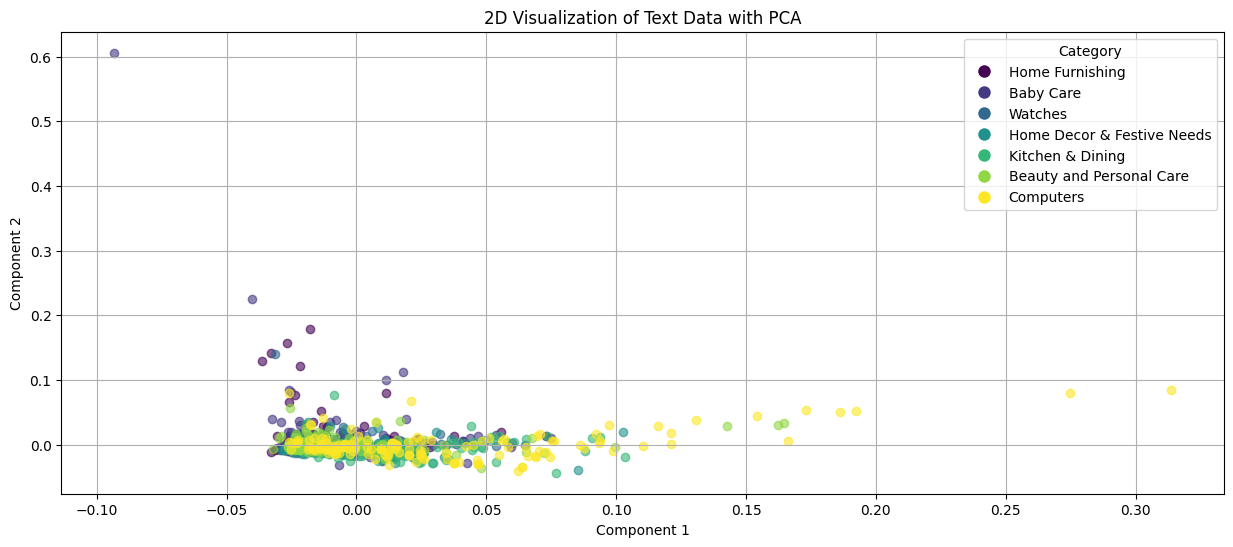

SIFT : 


C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI score: 0.0419


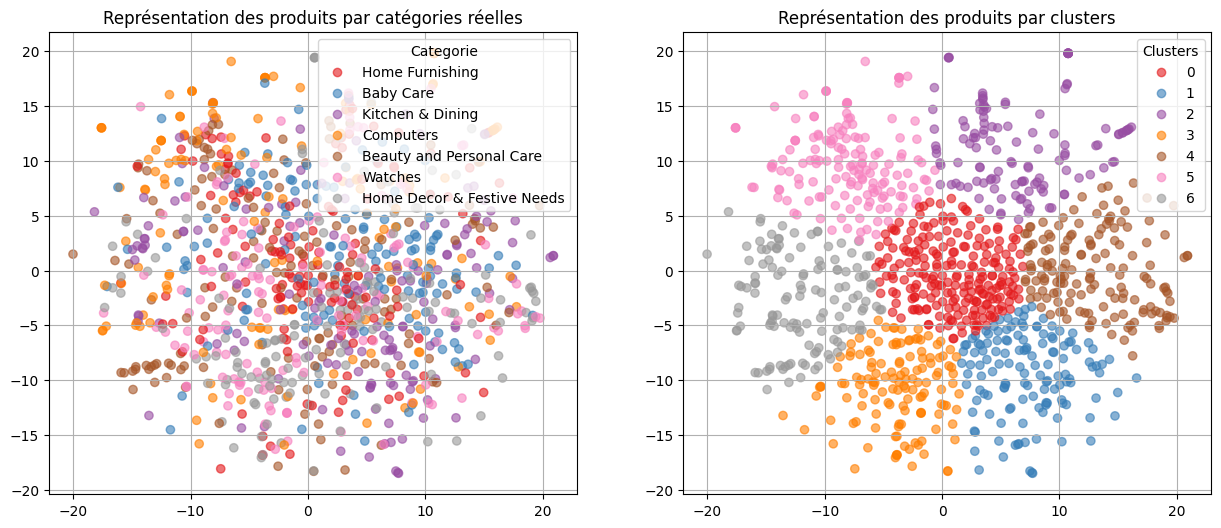

In [48]:
# Application de la PCA sur les histogrammes SIFT et visualisation
pca_fct(im_features_sift)

# Application du t-SNE sur les histogrammes SIFT et visualisation
print("SIFT : ")
tsne_visu_fct(im_features_sift)

Les graphiques générés par T-SNE révèlent que les clusters formés à partir des descripteurs extraits par SIFT sont très faiblement définis. Les points représentant les différentes catégories de produits se chevauchent fortement, ce qui indique que SIFT n'a pas réussi à extraire des caractéristiques distinctives permettant de séparer efficacement les produits selon leurs catégories. L'ARI score très bas (0.0408) confirme cette observation, illustrant que la méthode est loin d'être efficace dans ce contexte. Cela montre que SIFT, bien que performant pour certaines tâches de vision par ordinateur, est insuffisant pour capturer la variabilité visuelle complexe des produits dans ce dataset.

### 3.2 ORB<a name=32 ></a>

ORB (Oriented FAST and Rotated BRIEF) est un algorithme de détection et de description de points d'intérêt utilisé en vision par ordinateur. Il combine deux techniques principales : FAST (Features from Accelerated Segment Test) pour détecter les points d'intérêt et BRIEF (Binary Robust Independent Elementary Features) pour générer des descripteurs binaires autour de ces points.

ORB améliore FAST en ajoutant une étape de rotation, permettant au modèle de mieux reconnaître les objets, même lorsqu'ils sont tournés. Il améliore également BRIEF en rendant ses descripteurs robustes aux rotations. L'avantage principal d'ORB par rapport à des méthodes plus anciennes comme SIFT est qu'il est plus rapide et non breveté, ce qui le rend libre d'utilisation.

ORB est donc souvent utilisé dans des applications où la rapidité et l'efficacité sont cruciales, notamment pour des tâches de correspondance d'images ou de suivi d'objets. Cependant, il est généralement moins performant que SIFT ou des réseaux neuronaux modernes pour des tâches de classification d'images complexes.

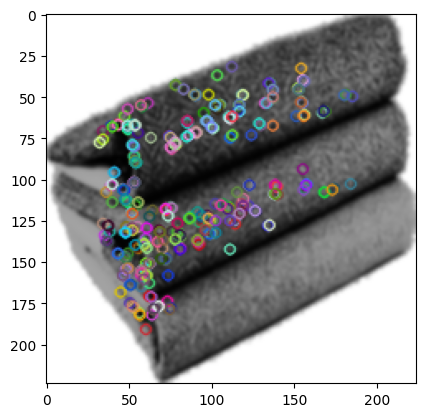

Descripteurs :  (302, 32)

[[238 114 242 ...  69  46 215]
 [ 79 249  51 ...  22 167  98]
 [ 46 120 176 ... 127  47 223]
 ...
 [169 142  76 ... 136  88 136]
 [189 247 213 ... 252 202  41]
 [ 99 130 197 ... 140  67 140]]


In [112]:
# Créer un objet ORB
orb = cv2.ORB_create()
# Détecter les keypoints et calculer les descripteurs avec ORB
kp, des = orb.detectAndCompute(flipkart['processed_image'][1], None)
# Dessiner les keypoints sur l'image
img = cv2.drawKeypoints(flipkart['processed_image'][1], kp, None)

# Afficher l'image avec les keypoints
plt.imshow(img)
plt.show()

# Afficher les dimensions des descripteurs
print("Descripteurs : ", des.shape)
print()
print(des)

Dans ce cas, ORB a été utilisé pour extraire des points d'intérêt et générer des descripteurs à partir d'une image du dataset. En détectant des caractéristiques visuelles importantes (comme des bords ou des coins distincts), ORB crée une représentation numérique de l'image sous la forme de vecteurs, appelés descripteurs. Ici, les descripteurs extraits forment une matrice de dimensions (300, 128), ce qui signifie que 300 points clés ont été détectés, chacun étant décrit par un vecteur de 128 valeurs.

Après avoir validé le bon fonctionnement de l'extraction de descripteurs sur une seule image, cette approche sera appliquée à l'ensemble du dataset pour extraire les caractéristiques visuelles de toutes les images. Ces descripteurs serviront ensuite comme données d'entrée pour entraîner un modèle de régression logistique, avec pour objectif de prédire la catégorie de chaque produit à partir de ses caractéristiques visuelles.

#### a. Régression Logistique<a name=33 ></a>

In [52]:
# Créer un objet ORB avec un nombre maximum de features spécifié
orb = cv2.ORB_create(nfeatures=500)
# Classifier les images et récupérer les descripteurs, le nombre de clusters, et les caractéristiques d'image
descriptors, k, im_features_orb = image_classifier(orb, 32)

# Afficher le nombre de descripteurs détectés
print("Nombre de descripteurs : ", descriptors)
# Afficher le nombre de clusters estimés
print("Nombre de clusters estimés : ", k)
print()

# Prédire les catégories à partir des caractéristiques d'image
predict_fct(im_features_orb)

C:\Users\Alex-\AppData\Local\Temp\ipykernel_9688\2854413909.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  descriptors_by_img = np.asarray(descriptors)


Nombre de descripteurs :  (329971, 32)
Nombre de clusters estimés :  574

Accuracy: 0.18571428571428572

Classification Report:
                            precision    recall  f1-score   support

                 Baby Care       0.00      0.00      0.00        27
  Beauty and Personal Care       0.11      0.95      0.20        21
                 Computers       0.75      0.47      0.58        38
Home Decor & Festive Needs       0.00      0.00      0.00        30
           Home Furnishing       0.00      0.00      0.00        35
          Kitchen & Dining       0.20      0.04      0.06        26
                   Watches       0.00      0.00      0.00        33

                  accuracy                           0.19       210
                 macro avg       0.15      0.21      0.12       210
              weighted avg       0.17      0.19      0.13       210



C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


La précision obtenue est restée la même que celle de SIFT, soit 19%, ce qui suggère que cette méthode souffre des mêmes limitations. En effet, bien qu'ORB soit plus rapide, il n'apporte pas d'amélioration significative pour cette tâche de classification. Certaines classes, telles que Beauty and Personal Care et Computers, ont montré de meilleures performances, mais d'autres ont présenté des résultats quasi nuls, notamment Baby Care et Watches. ORB ne parvient donc pas à extraire des caractéristiques suffisamment distinctes pour séparer correctement les classes de produits.

#### b. Analyse en Composantes Principales (PCA) & T-SNE<a name=34 ></a>

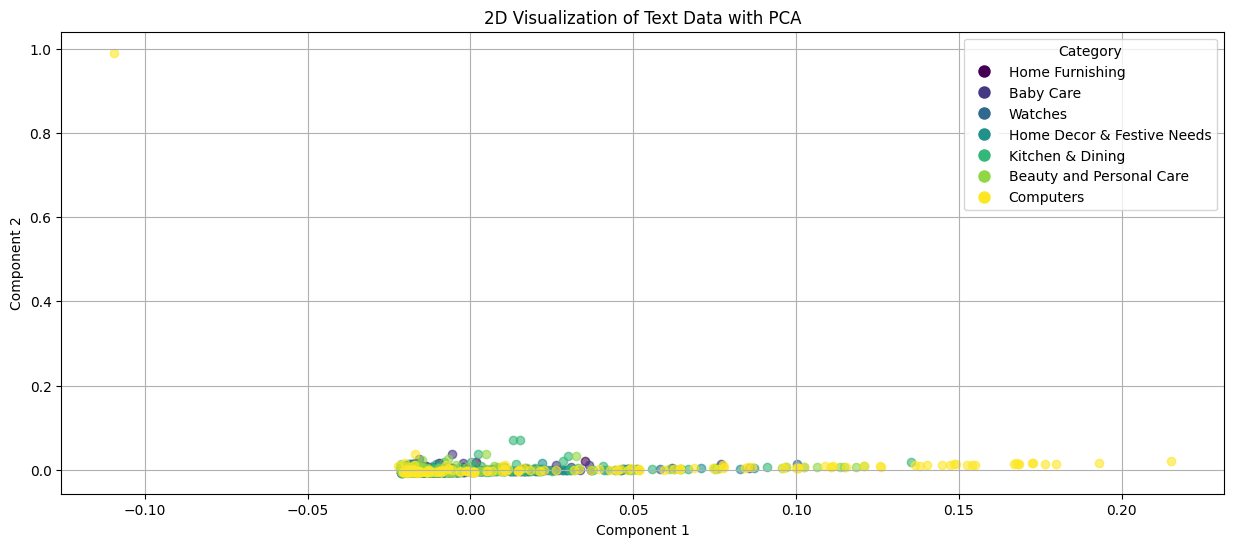

ORB : 


C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI score: 0.0285


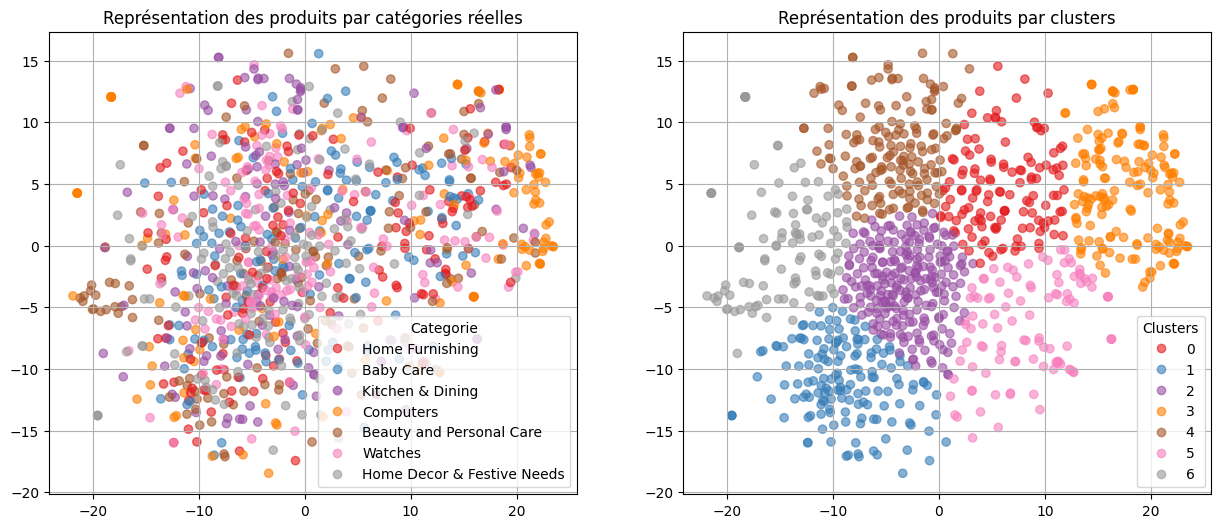

In [54]:
# Application de la PCA sur les caractéristiques d'image extraites par ORB et visualisation
pca_fct(im_features_orb)

# Application du t-SNE sur les caractéristiques d'image extraites par ORB et visualisation
print("ORB : ")
tsne_visu_fct(im_features_orb)

Les graphiques et les scores suivants confirment qu'à l'instar des descripteurs SIFT, les descripteurs ORB ne parviennent pas à capturer des informations suffisamment distinctives pour une bonne séparation entre les classes.

Les similitudes de SIFT et ORB en termes de précision et de capacité à regrouper les images montrent que les méthodes classiques d'extraction de caractéristiques ne sont pas bien adaptées à ce jeu de données complexe. Elles échouent à capturer des informations visuelles significatives, notamment en raison de la diversité des produits et des images, qui nécessitent des approches plus sophistiquées, ce à quoi nous allons procéder au cours du chapitre qui suit.

## 4. Réseaux de Neurones Pré-Entraînés (CNN)<a name=35 ></a>

Les Réseaux de Neurones Convolutifs (CNN) pré-entraînés sont des modèles qui ont été formés au préalable sur des bases de données massives, comme ImageNet, contenant des millions d'images. L'objectif est de capturer des caractéristiques générales des images qui peuvent ensuite être réutilisées pour d'autres tâches spécifiques sans avoir besoin de les entraîner à partir de zéro.

Un CNN pré-entraîné a déjà appris à détecter des motifs courants (comme les bords, textures, formes) dans les images au travers d'un entraînement initial. Par exemple, des modèles comme VGG16 ou ResNet sont souvent utilisés après avoir été formés sur des tâches de classification d'images générales. Une fois le modèle pré-entraîné, on peut ajuster ses couches finales pour l'adapter à une nouvelle tâche ou un nouveau jeu de données. Cela réduit considérablement le temps d'entraînement et permet de tirer parti de la "connaissance" du modèle déjà acquis. 

Le recours aux Réseaux de Neurones Convolutifs pré-entraînés a pour avantages de réduire les temps de calcul en réutilisant des modèles déjà optimisés, et d'améliorer la précision des résultats même avec des bases de données spécifiques ou de taille réduite, car le modèle bénéficie des caractéristiques pré-apprises. Enfin, ces modèles sont applicables à une grande variété de tâches, de la classification d'images à la détection d'objets. C'est pourquoi cette approche est très utile pour les projets où le volume de données d'entraînement est limité ou lorsqu'on souhaite accélérer le développement d'un modèle performant.


### 4.1 VGG16<a name=36 ></a>

Le modèle VGG16 est un réseau de neurones convolutifs (CNN) profond, reconnu pour sa capacité à classifier des images. Conçu par l'équipe de Visual Geometry Group à l'Université d'Oxford, VGG16 comprend 16 couches pondérées, dont 13 couches convolutives et 3 couches entièrement connectées.

Il utilise de petits filtres de convolution (3x3) pour extraire des caractéristiques visuelles détaillées tout en empilant plusieurs couches pour capturer des motifs complexes. Les images d'entrée doivent être de taille fixe (224x224 pixels). Grâce à son architecture, VGG16 peut être pré-entraîné sur de vastes ensembles de données comme ImageNet, permettant de transférer les connaissances acquises à d'autres tâches de classification d'images. Cela rend VGG16 particulièrement efficace pour des applications variées, y compris la classification de produits.

In [56]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

# Charger le modèle VGG16 pré-entraîné sans la couche de classification finale
base_model = VGG16()
# Créer un nouveau modèle qui sort le résultat de l'avant-dernière couche
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

# Afficher le résumé du modèle
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Le processus consiste à charger chaque image dans le modèle VGG16 après l’avoir prétraitée (conversion en format RGB, redimensionnement et normalisation), et à obtenir un vecteur de caractéristiques de taille 4096 pour chaque image. Ces vecteurs représentent des caractéristiques complexes, telles que des motifs, des textures et des formes.

1/1 [==============================] - 1s 1s/step


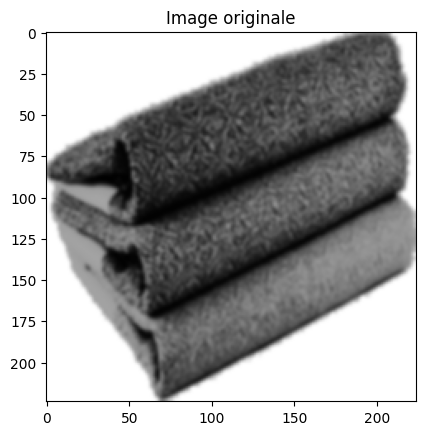

Descripteurs (features extraites) :  (1, 4096)
[[0. 0. 0. ... 0. 0. 0.]]


In [58]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

# Convertir l'image traitée en format RGB
image_orig = cv2.cvtColor(flipkart['processed_image'][1], cv2.COLOR_GRAY2RGB)
# Convertir l'image en tableau numpy
image = img_to_array(image_orig) 
# Ajouter une dimension supplémentaire pour représenter le lot (batch)
image = np.expand_dims(image, axis=0)
# Prétraiter l'image selon les exigences de VGG16
image = preprocess_input(image)
# Extraire les caractéristiques de l'image à l'aide du modèle
des = model.predict(image)

# Afficher l'image originale
plt.imshow(image_orig, cmap='gray')
plt.title('Image originale')
plt.show()

# Afficher les descripteurs (features extraites)
print("Descripteurs (features extraites) : ", des.shape)
print(des)

En utilisant le modèle VGG16, nous avons extrait des caractéristiques des images du dataset. Le processus commence par la conversion de l'image en format RGB, suivie de sa transformation en tableau avec la fonction img_to_array, ce qui permet de manipuler facilement les données. Ensuite, l'image est redimensionnée et prétraitée avec preprocess_input, qui normalise les valeurs de pixel pour s'adapter à l'échelle de données attendue par VGG16.

Après cette préparation, nous appliquons le modèle pré-entraîné pour générer des descripteurs à partir de la dernière couche avant la classification finale. Cela donne un vecteur de caractéristiques de dimension (1, 4096), qui capture des informations détaillées sur le contenu de l'image. Les résultats montrent que ces descripteurs sont significativement plus riches et informatifs que ceux obtenus par des méthodes classiques comme SIFT ou ORB. En conséquence, cette approche améliore considérablement les performances du modèle de classification, facilitant une meilleure distinction entre les différentes catégories de produits dans notre analyse.

#### a. Régression Logistique<a name=37 ></a>

In [60]:
# Liste pour stocker les caractéristiques extraites
im_features_vgg = []

# Extraire les caractéristiques pour chaque image traitée
for image in flipkart['processed_image']:
    # Convertir l'image de niveaux de gris à RGB
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Convertir l'image en tableau numpy
    image = img_to_array(image)
    # Ajouter une dimension supplémentaire pour représenter le lot
    image = np.expand_dims(image, axis=0)
    # Prétraiter l'image selon les exigences de VGG16    
    image = preprocess_input(image)
    # Extraire les caractéristiques et les ajouter à la liste
    im_features_vgg.append(model.predict(image, verbose=0)[0])

# Convertir la liste de caractéristiques en tableau numpy
im_features_vgg = np.asarray(im_features_vgg)

# Afficher la forme des caractéristiques extraites
print(im_features_vgg.shape)
print()

# Utiliser la fonction de prédiction sur les caractéristiques extraites
predict_fct(im_features_vgg)

(1050, 4096)

Accuracy: 0.819047619047619

Classification Report:
                            precision    recall  f1-score   support

                 Baby Care       0.64      0.67      0.65        27
  Beauty and Personal Care       0.94      0.81      0.87        21
                 Computers       0.80      0.95      0.87        38
Home Decor & Festive Needs       0.78      0.83      0.81        30
           Home Furnishing       0.80      0.69      0.74        35
          Kitchen & Dining       0.88      0.81      0.84        26
                   Watches       0.94      0.94      0.94        33

                  accuracy                           0.82       210
                 macro avg       0.83      0.81      0.82       210
              weighted avg       0.82      0.82      0.82       210



L'utilisation de VGG16 a permis une extraction de caractéristiques beaucoup plus robuste, une amélioration drastique par rapport aux méthodes précédentes (SIFT et ORB). Les couches profondes du réseau sont capables de capturer des informations complexes et abstraites, qui différencient efficacement les catégories de produits. Les catégories visuellement distinctes, comme les Watches et Computers, ont des taux de classification très élevés, tandis que des catégories plus subtiles comme Home Furnishing montrent encore des défis.

#### b. Analyse en Composantes Principales (PCA) & T-SNE<a name=38 ></a>

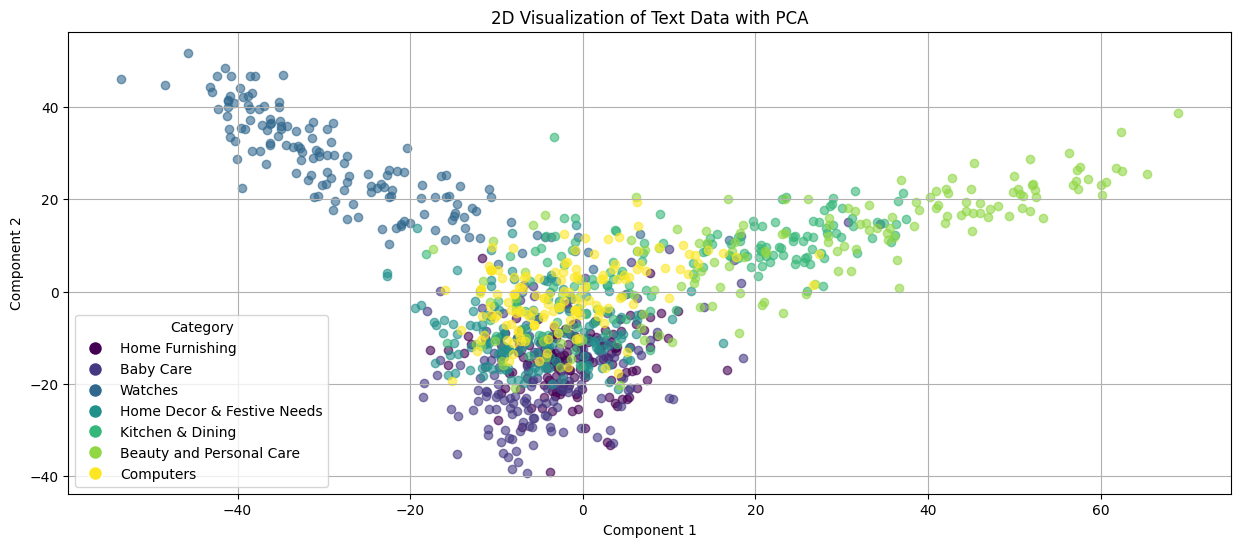

VGG16 : 


C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI score: 0.3547


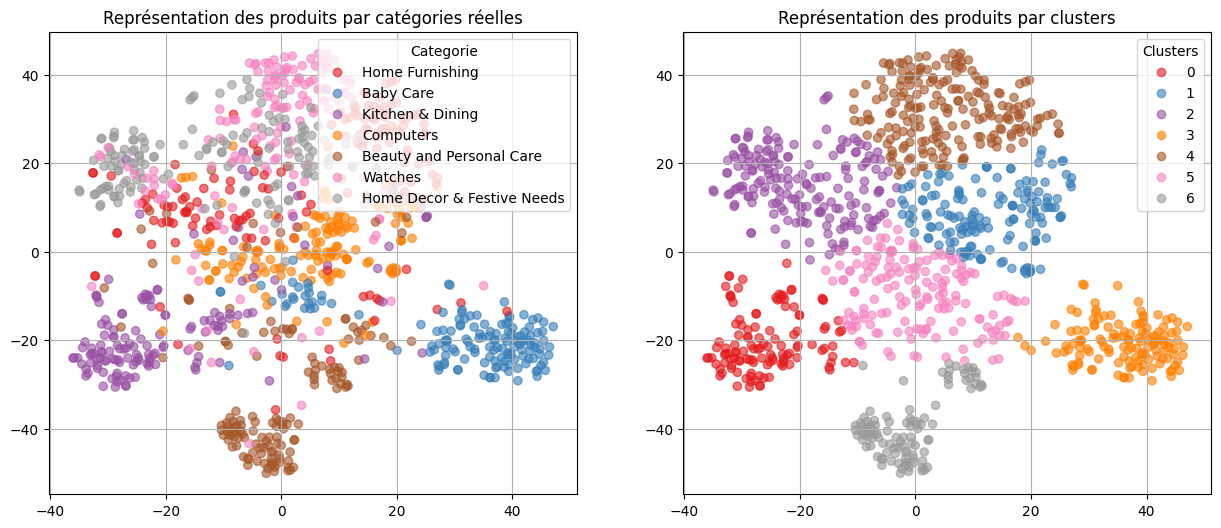

In [62]:
# Application de la PCA sur les caractéristiques extraites par VGG16 et visualisation
pca_fct(im_features_vgg)

# Application du t-SNE sur les caractéristiques extraites par VGG16 et visualisation
print("VGG16 : ")
tsne_visu_fct(im_features_vgg)

Les analyses effectuées sur les caractéristiques extraites par VGG16 montrent une nette amélioration dans la séparation des différentes classes de produits. En appliquant des techniques de réduction de dimensionnalité, il est évident que les clusters sont non seulement plus distincts par rapport à ceux obtenus avec les méthodes précédentes, mais qu'ils démontrent également une meilleure cohésion interne. Cela signifie que les images similaires sont regroupées plus efficacement, facilitant ainsi la classification des produits.

Cette tendance s'illustre par des clusters bien définis, où chaque groupe représente une catégorie de produit spécifique. Cette capacité à identifier et à regrouper les images similaires témoigne de la puissance de VGG16 en tant qu'outil pour l'extraction de caractéristiques, rendant cette approche particulièrement adaptée pour des tâches de classification d'images complexes. En somme, ces résultats soulignent l'importance d'utiliser des modèles pré-entraînés tels que VGG16 pour optimiser les performances des systèmes de classification d'images dans le domaine du e-commerce.

### 4.2 Restnet50<a name=39 ></a>

ResNet50 est un modèle de réseau de neurones convolutifs conçu pour surmonter le problème de la dégradation dans les réseaux profonds. Il utilise des "skip connections" ou "residual connections", qui permettent de contourner certaines couches, facilitant ainsi l'apprentissage. Plutôt que d'apprendre une fonction complète, le modèle apprend à ajuster les résidus, ce qui améliore la capacité à capturer des caractéristiques complexes.

Avec 50 couches, ResNet50 est efficace pour la classification d'images. Pré-entraîné sur des ensembles de données comme ImageNet, il bénéficie de représentations généralisées, ce qui le rend particulièrement adapté aux tâches de reconnaissance d'images. En résumé, ResNet50 allie profondeur et performance, en rendant l'apprentissage plus accessible pour des applications de classification.

In [64]:
from tensorflow.keras.applications import ResNet50

# Charger le modèle ResNet50, sans la couche de classification finale
base_model = ResNet50()
# Créer un modèle qui utilise les mêmes entrées que ResNet50 mais avec la sortie de l'avant-dernière couche
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

# Afficher le résumé du modèle
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

ResNet50 extrait des vecteurs de caractéristiques de taille 2048, que nous utilisons ensuite avec un modèle de régression logistique pour la classification.

1/1 [==============================] - 2s 2s/step


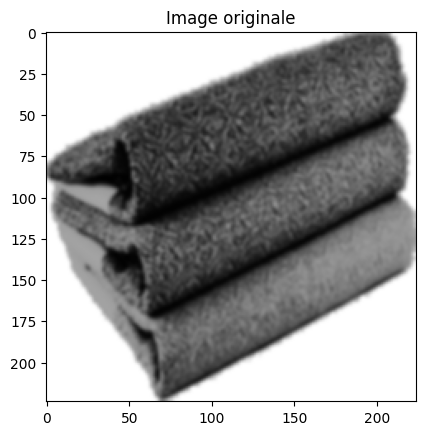

Descripteurs (features extraites) :  (1, 2048)
[[0.         0.         0.13601227 ... 0.         0.         0.        ]]


In [66]:
# Convertir l'image traitée en couleur pour la visualiser correctement
image_orig = cv2.cvtColor(flipkart['processed_image'][1], cv2.COLOR_GRAY2RGB)

# Convertir l'image en tableau numpy et préparer l'image pour ResNet
image = img_to_array(image_orig) 
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

# Prédire les descripteurs (features) en utilisant le modèle ResNet50
des = model.predict(image)

# Afficher l'image originale
plt.imshow(image_orig, cmap='gray')
plt.title('Image originale')
plt.show()

# Afficher la forme des descripteurs extraits et leur contenu
print("Descripteurs (features extraites) : ", des.shape)
print(des)

Le code commence par convertir une image en niveaux de gris en une image en couleur en utilisant la fonction cv2.cvtColor. Ensuite, l'image est transformée en un tableau NumPy avec img_to_array, ce qui est nécessaire pour que le modèle puisse traiter l'image. Pour préparer l'image pour l'entrée dans le modèle, elle est ensuite redimensionnée avec np.expand_dims pour ajouter une dimension supplémentaire, et le prétraitement spécifique au modèle est appliqué via preprocess_input.

Après cette préparation, le modèle pré-entraîné génère des descripteurs, qui sont des caractéristiques extraites de l'image, fournissant une représentation numérique de son contenu. L'image originale est ensuite affichée à l'aide de plt.imshow, avec un titre approprié. Finalement, le code imprime la forme des descripteurs extraits, qui est de (1, 2048), indiquant qu'une seule image a été analysée et que 2048 caractéristiques ont été extraites. Les valeurs des descripteurs fournissent des informations sur les caractéristiques spécifiques de l'image, permettant d'évaluer sa similarité avec d'autres images lors de tâches de classification ou de recherche.

#### a. Régression Logistique<a name=40 ></a>

In [68]:
# Initialisation d'une liste pour stocker les caractéristiques extraites
im_features_restnet = []

# Parcourir chaque image traitée dans le DataFrame 'flipkart'
for image in flipkart['processed_image']:
    # Convertir l'image de niveaux de gris à couleur
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    
    # Convertir l'image en tableau numpy et préparer l'image pour ResNet
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)

    # Prédire les descripteurs (features) en utilisant le modèle ResNet50
    im_features_restnet.append(model.predict(image, verbose=0)[0])

# Convertir la liste des caractéristiques en tableau numpy
im_features_restnet = np.asarray(im_features_restnet)

# Afficher la forme du tableau de caractéristiques extraites
print(im_features_restnet.shape)
print()

# Appeler la fonction de prédiction sur les caractéristiques extraites
predict_fct(im_features_restnet)

(1050, 2048)

Accuracy: 0.8285714285714286

Classification Report:
                            precision    recall  f1-score   support

                 Baby Care       0.69      0.67      0.68        27
  Beauty and Personal Care       0.83      0.71      0.77        21
                 Computers       0.89      0.89      0.89        38
Home Decor & Festive Needs       0.73      0.80      0.76        30
           Home Furnishing       0.86      0.71      0.78        35
          Kitchen & Dining       0.81      0.96      0.88        26
                   Watches       0.94      1.00      0.97        33

                  accuracy                           0.83       210
                 macro avg       0.82      0.82      0.82       210
              weighted avg       0.83      0.83      0.83       210



ResNet50, grâce à ses connexions résiduelles, parvient également à extraire des caractéristiques très utiles pour la classification. Il montre de bonnes performances pour des catégories comme Kitchen & Dining et Watches, bien que les résultats soient légèrement inférieurs à ceux de VGG16 pour certaines autres catégories. Cela peut s'expliquer par les différences dans la manière dont ces réseaux apprennent et extraient les caractéristiques visuelles.

#### b. Analyse en Composantes Principales (PCA) & T-SNE<a name=41 ></a>

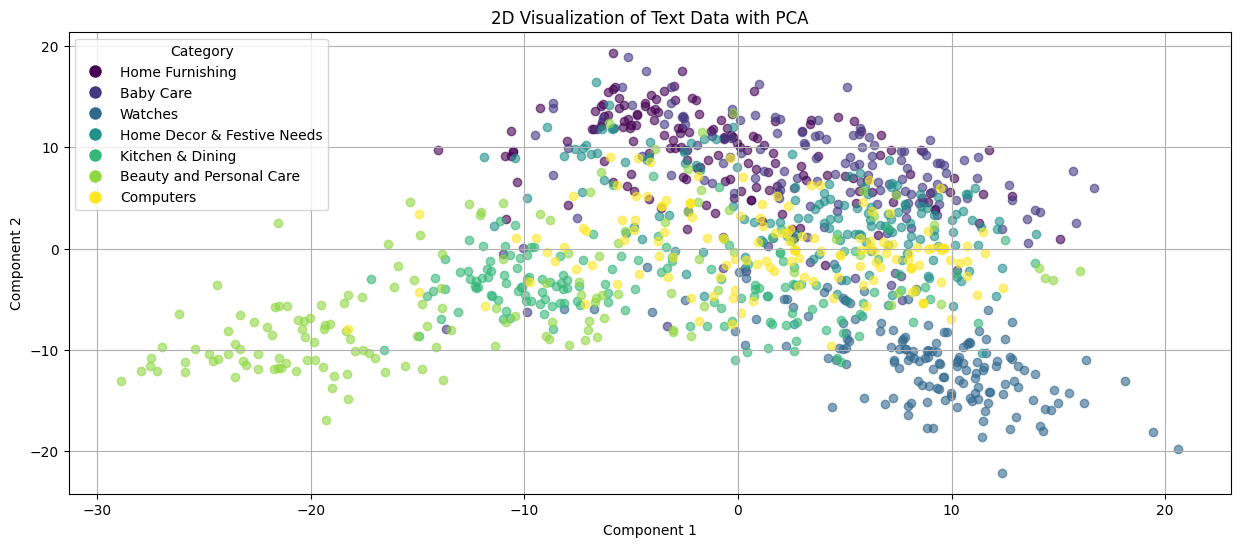

Restnet : 


C:\Users\Alex-\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI score: 0.3877


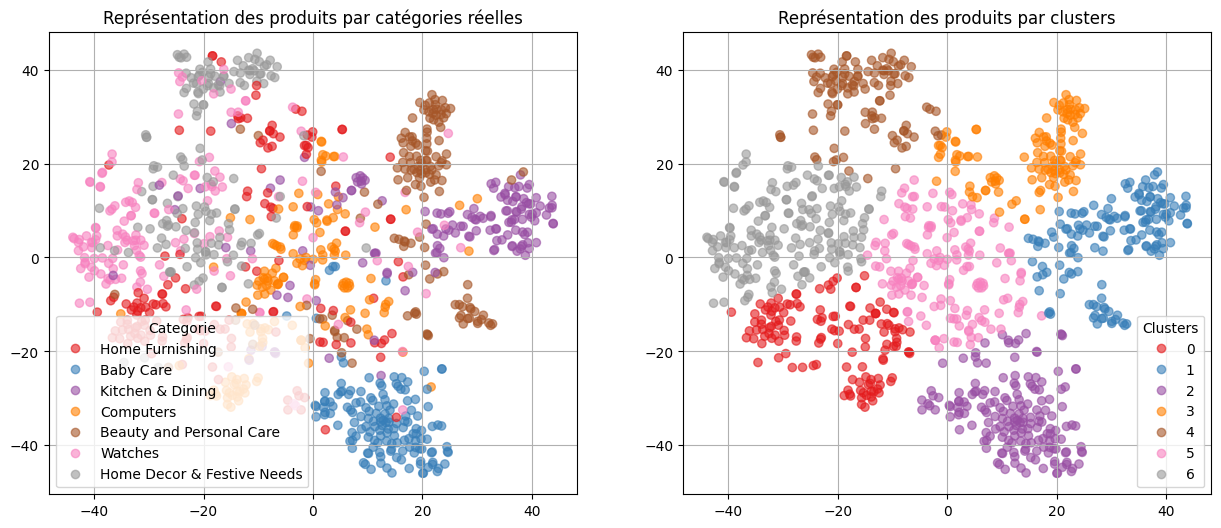

In [70]:
# Application de la PCA sur les caractéristiques extraites par RestNet50 et visualisation
pca_fct(im_features_restnet)

# Application du t-SNE sur les caractéristiques extraites par RestNet50 et visualisation
print("Restnet : ")
tsne_visu_fct(im_features_restnet)

Les modèles VGG16 et ResNet50 surpassent de loin les méthodes classiques comme SIFT et ORB, aussi bien en termes de performance en classification que de capacité à regrouper les images. VGG16 a montré une légère supériorité en termes de précision, bien que ResNet50 ait des indicateurs de performance légèrement plus élevés, indiquant qu'il parvient à regrouper les images de manière plus cohérente.

## Conclusion<a name=42 ></a>

Dans cette étude, nous avons examiné diverses approches pour la classification des produits par image, en mettant l’accent sur l’extraction de caractéristiques et l’utilisation de modèles d’apprentissage profond. Les méthodes classiques telles que SIFT et ORB, bien qu’efficaces pour certaines tâches de détection de caractéristiques, ont montré des résultats décevants en termes de précision et de capacité à former des clusters distincts. Leur faible performance témoigne de leurs limitations dans le traitement de la variabilité visuelle complexe présente dans les images de produits, ce qui les rend moins adaptées aux tâches de classification.

En revanche, les modèles de réseaux de neurones convolutifs tels que VGG16 et ResNet50 ont fait preuve d'une supériorité marquée dans cette tâche. Leur capacité à apprendre des représentations hiérarchiques des données visuelles a conduit à des performances de classification beaucoup plus élevées, indiquant qu’ils sont capables de saisir des caractéristiques complexes des images. Ces modèles, ayant été pré-entraînés sur des ensembles de données vastes et variés, se sont révélés particulièrement efficaces pour traiter des images de produits, permettant une meilleure séparation des classes.

Les indicateurs de performance mesurant la qualité du clustering ont également montré que les modèles modernes offrent une séparation plus significative entre les catégories de produits par rapport aux méthodes traditionnelles. Cela souligne l'importance d'utiliser des techniques d'apprentissage profond pour des tâches de classification d'images où la variabilité et la complexité des visuels sont élevées.

En somme, cette étude illustre clairement que, dans le contexte de la classification de produits par image, les modèles d'apprentissage profond tels que VGG16 et ResNet50 surpassent largement les méthodes classiques en termes de précision et de capacité à organiser les produits en clusters significatifs. Cela ouvre la voie à des applications pratiques dans le e-commerce, où des systèmes de recommandation plus sophistiqués et une expérience utilisateur améliorée peuvent être développés grâce à l'exploitation efficace des données visuelles.

# Conclusion Générale<a name=43 ></a>

Au terme de cette étude, nous avons exploré en profondeur la classification de produits à la fois par texte et par image, mettant en lumière les différentes approches et techniques disponibles dans ces deux domaines. En ce qui concerne la classification de produits par texte, il a été clairement démontré que les méthodes modernes de vectorisation, telles que Bag of Words et TF-IDF, surpassent les modèles plus traditionnels comme Word2Vec et les variantes de BERT. L'utilisation de représentations contextuelles a permis d'atteindre des performances impressionnantes, démontrant l'importance d'adopter des techniques avancées pour obtenir des résultats optimaux en traitement du langage naturel. De plus, les visualisations effectuées à l'aide de méthodes telles que T-SNE ont révélé la capacité des modèles modernes à créer des clusters bien définis, améliorant ainsi la performance des systèmes de recommandation.

Dans le domaine de la classification de produits par image, les résultats ont confirmé que les méthodes traditionnelles d'extraction de caractéristiques, comme SIFT et ORB, sont largement dépassées par les modèles de réseaux de neurones convolutifs tels que VGG16 et ResNet50. Ces derniers ont démontré leur capacité à traiter la variabilité des images de produits avec une précision supérieure, permettant une meilleure séparation des classes et une formation de clusters plus distincts. L’intégration de techniques d’apprentissage profond s’avère donc cruciale pour la classification efficace d'images, offrant des perspectives prometteuses pour les applications pratiques dans le e-commerce.

En somme, cette étude illustre l'importance d'utiliser des méthodes avancées, tant pour le traitement de texte que pour le traitement d'images, afin d'améliorer les performances de classification et de recommandation des produits. La combinaison de ces deux approches pourrait aboutir à des systèmes plus robustes et intuitifs, offrant ainsi une expérience utilisateur améliorée.

À présent, nous allons nous diriger vers une autre dimension de la classification en explorant la classification supervisée. Ce prochain notebook se concentrera sur l'application de modèles d'apprentissage automatique supervisés pour affiner davantage nos capacités de classification, en tirant parti des informations et des résultats obtenus dans cette étude. Nous verrons comment ces méthodes peuvent être intégrées pour créer des systèmes de classification encore plus précis et adaptés aux besoins des utilisateurs.